In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
threshold_for_results = 0.5

# RAM workable at 5% rescaled
#rescaled_size = (54,96)

# Grayscale has 1 dim (Can drop it)
# Width, Height
#input_shape = (200, 100)
#flatten_shape = (20000)

# RGB has 3 dims
input_shape = (None, 100, 200, 3)
flatten_shape = (None, 20000, 3)
flatten_value = 20000

print("Shape Ready")

Shape Ready


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020

from numpy.random import seed
seed(seed_value)

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_random_seed(seed_value)

print(tf.__version__)
print("Seed values re-set to 2019.")

1.15.0
Seed values re-set to 2019.


In [0]:
# Imports to read images
from matplotlib import pyplot as plt
#from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray
import glob
from skimage.io import imread
print("Import Done")

Import Done


In [0]:
# Imports for model building from tutorial site
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LSTM
from keras.layers import cudnn_recurrent
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
print("Import Done")

Import Done


In [0]:
# Imports from previous model building
%matplotlib inline
import matplotlib.pyplot as plt
#import tensorflow as tf
#!pip install numpy==1.16.1
import numpy as np

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print(tf.__version__)
print("Import Done")

1.15.0
Import Done


In [0]:
# Imports for image downscaling because it takes too much RAM
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
print("Import Done")

Import Done


In [0]:
# Test code for rescaling
# Original Size = (200,100) Width, Height
# Total Images = 721

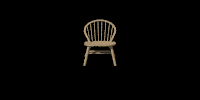

In [0]:
# Load first image for viewing
image1 = image.load_img('/content/drive/My Drive/Colab Notebooks/4) Rotated Pictures/ws_chair_rotate001.png', grayscale=False)
image1

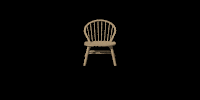

In [0]:
# Load last image for viewing
image1 = image.load_img('/content/drive/My Drive/Colab Notebooks/4) Rotated Pictures/ws_chair_rotate721.png', grayscale=False)
image1

In [0]:
# Training Set
# To split the data to train 7 models, such that later models have more exposure to more data
# The pictures are NOT to be shuffled, the pictures are modified with increasing variance (in terms of rotation)
# The rotation is only done in one direction, therefore pictures that are the same (rotated 180 degrees) will be removed

# Model 1: Only the original unmodified image (001)
# Model 2: 001 ~ 144
# Model 3: 001 ~ 288
# Model 4: 001 ~ 432
# Model 5: 001 ~ 576
# Model 6: 001 ~ 711 # Leave out last 10
# Model 7: 270 ~ 271

# Test Set
# All models are tested on the entire dataset of 721

In [0]:
# Data input
# Read in the training images
# Values are in RGB from 0 to 255, divide by 255 to get values from 0 to 1

train_image = []
for i in tqdm(range(1,720)):
    if i == 361: 
      continue
    elif i == 362: 
      continue
    elif i < 10:
      stringIndex = "00" + str(i)
    elif i < 100:
      stringIndex = "0" + str(i)
    else:
      stringIndex = str(i)

    # Parameter if needed: target_size = rescaled_size
    img = image.load_img('/content/drive/My Drive/Colab Notebooks/4) Rotated Pictures/ws_chair_rotate' + stringIndex + '.png', grayscale=False)

    img = image.img_to_array(img)
    img = img/255 
    train_image.append(img)

print(len(train_image))
#X = np.array(train_image) # wait for train face image below

100%|██████████| 719/719 [00:00<00:00, 774.29it/s]

717


In [0]:
X = np.array(train_image) # Transfer

# Create y values for training data
# All are 1s, since all are pictures of target chair
y = [1] * 2155
y = np.asarray(y)

print(type(X))
print(X.shape)
print(len(X)) # Total length should be 921 training data

print(type(y))
print(y.shape)
print(len(y)) # Total length should be 921 training data


<class 'numpy.ndarray'>
(717, 100, 200, 3)
717
<class 'numpy.ndarray'>
(2155,)
2155


In [0]:
print(len(X))
print(X.shape)

print(len(y))
print(y.shape)

717
(717, 100, 200, 3)
2155
(2155,)


In [0]:
print(X.shape)
#index = [150,299]
a = X[150]
b = X[299]
#XTrain_for_model7 = np.array(X[101],X[201],X[402])
abc = [a,b]
XTrain_for_model7 = np.array(abc)
print(XTrain_for_model7.shape)

In [0]:
print(X.shape)
#index = [270,271]
XVal_for_model7 = np.delete(X, 270,0)
print(XVal_for_model7.shape)
XVal_for_model7 = np.delete(XVal_for_model7, 270,0)
print(XVal_for_model7.shape)

(717, 100, 200, 3)
(716, 100, 200, 3)
(715, 100, 200, 3)


In [0]:
# Split into 6 portions, with the rest as validation sets
X_train1 = X[0:1]
X_train2 = X[0:145]
X_train3 = X[0:289]
X_train4 = X[0:433]
X_train5 = X[0:577]
X_train6 = X[0:707] # Remove last 10 images to set as validation
X_train7 = X[270:271] # Trained on middle 2 images, in the middle of rotation, therefore "newer" picture to model

X_train1_flatten = X_train1.reshape(1,flatten_value, 3)
X_train2_flatten = X_train2.reshape(len(X_train2),flatten_value, 3)
X_train3_flatten = X_train3.reshape(len(X_train3),flatten_value, 3)
X_train4_flatten = X_train4.reshape(len(X_train4),flatten_value, 3)
X_train5_flatten = X_train5.reshape(len(X_train5),flatten_value, 3)
X_train6_flatten = X_train6.reshape(len(X_train6),flatten_value, 3)
X_train7_flatten = X_train7.reshape(len(X_train7),flatten_value, 3)

y_train1 = y[0:1]
y_train2 = y[0:145]
y_train3 = y[0:289]
y_train4 = y[0:433]
y_train5 = y[0:577]
y_train6 = y[0:707]
y_train7 = y[270:271]

X_val1 = X[1:717]
X_val2 = X[145:717]
X_val3 = X[289:717]
X_val4 = X[433:717]
X_val5 = X[577:717]
X_val6 = X[707:717]
X_val7 = XVal_for_model7

X_val1_flatten = X_val1.reshape(len(X_val1),flatten_value, 3)
X_val2_flatten = X_val2.reshape(len(X_val2),flatten_value, 3)
X_val3_flatten = X_val3.reshape(len(X_val3),flatten_value, 3)
X_val4_flatten = X_val4.reshape(len(X_val4),flatten_value, 3)
X_val5_flatten = X_val5.reshape(len(X_val5),flatten_value, 3)
X_val6_flatten = X_val6.reshape(len(X_val6),flatten_value, 3)
X_val7_flatten = X_val7.reshape(len(X_val7),flatten_value, 3)

y_val1 = y[1:717]
y_val2 = y[145:717]
y_val3 = y[289:717]
y_val4 = y[433:717]
y_val5 = y[577:717]
y_val6 = y[707:717]
y_val7 = y[0:715]

print("X Length")
print(len(X))

print("X Train Length")
print(len(X_train1))
print(len(X_train2))
print(len(X_train3))
print(len(X_train4))
print(len(X_train5))
print(len(X_train6))
print(len(X_train7))

print("X_train shape")
print(X_train1.shape)
print(X_train2.shape)
print(X_train3.shape)
print(X_train4.shape)
print(X_train5.shape)
print(X_train6.shape)
print(X_train7.shape)

print("X_train flatten")
print(X_train1_flatten.shape)
print(X_train2_flatten.shape)
print(X_train3_flatten.shape)
print(X_train4_flatten.shape)
print(X_train5_flatten.shape)
print(X_train6_flatten.shape)
print(X_train7_flatten.shape)

print("X_val shape")
print(X_val1.shape)
print(X_val2.shape)
print(X_val3.shape)
print(X_val4.shape)
print(X_val5.shape)
print(X_val6.shape)
print(X_val7.shape)

print("X_val flatten")
print(X_val1_flatten.shape)
print(X_val2_flatten.shape)
print(X_val3_flatten.shape)
print(X_val4_flatten.shape)
print(X_val5_flatten.shape)
print(X_val6_flatten.shape)
print(X_val7_flatten.shape)

print("Data Prepared")

X Length
717
X Train Length
1
145
289
433
577
707
1
X_train shape
(1, 100, 200, 3)
(145, 100, 200, 3)
(289, 100, 200, 3)
(433, 100, 200, 3)
(577, 100, 200, 3)
(707, 100, 200, 3)
(1, 100, 200, 3)
X_train flatten
(1, 20000, 3)
(145, 20000, 3)
(289, 20000, 3)
(433, 20000, 3)
(577, 20000, 3)
(707, 20000, 3)
(1, 20000, 3)
X_val shape
(716, 100, 200, 3)
(572, 100, 200, 3)
(428, 100, 200, 3)
(284, 100, 200, 3)
(140, 100, 200, 3)
(10, 100, 200, 3)
(715, 100, 200, 3)
X_val flatten
(716, 20000, 3)
(572, 20000, 3)
(428, 20000, 3)
(284, 20000, 3)
(140, 20000, 3)
(10, 20000, 3)
(715, 20000, 3)
Data Prepared


In [0]:
print("y_train")
print(y_train1.shape)
print(y_train2.shape)
print(y_train3.shape)
print(y_train4.shape)
print(y_train5.shape)
print(y_train6.shape)
print(y_train7.shape)

print("y_val")
print(y_val1.shape)
print(y_val2.shape)
print(y_val3.shape)
print(y_val4.shape)
print(y_val5.shape)
print(y_val6.shape)
print(y_val7.shape)

y_train
(1,)
(145,)
(289,)
(433,)
(577,)
(707,)
(1,)
y_val
(716,)
(572,)
(428,)
(284,)
(140,)
(10,)
(715,)


In [0]:
# Clear Variables no longer needed
train_image = None
X = None
XVal_for_model7 = None
y = None

In [0]:
###########################################################################################################################
#------------------------------------------------------------Model Building-----------------------------------------------#
###########################################################################################################################

In [0]:
# User defined parameters
batch_size_user = 2
epoch_user = 1
times_to_loop_model = 3

print("User defined parameters set")
print(batch_size_user)
print(epoch_user)
print(times_to_loop_model)

User defined parameters set
2
1
3


In [0]:
###########################################################################################################################
#------------------------------------------------------------Dense Model-----------------------------------------------#
###########################################################################################################################

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 60000)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 120002    
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 3         
Total params: 120,011
Trainable params: 120,011
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 1 samples, validate on 716 samples
Epoch 1/1
1/1 [==============================] - 1s 1s/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6994 - val_acc: 0.2989
(716, 1)


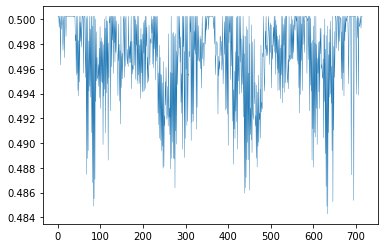

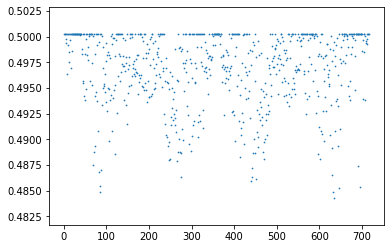

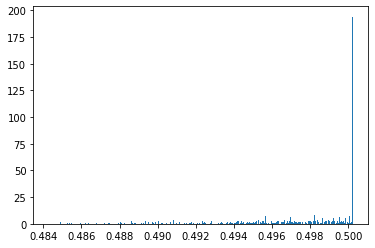

Average value is:  0.49691722
Total Predicted Positive:  430  out of  716
60.05586592178771 %
Epoch:  2
Train on 1 samples, validate on 716 samples
Epoch 1/1
1/1 [==============================] - 1s 622ms/step - loss: 0.6926 - acc: 1.0000 - val_loss: 0.6989 - val_acc: 0.3268
(716, 1)


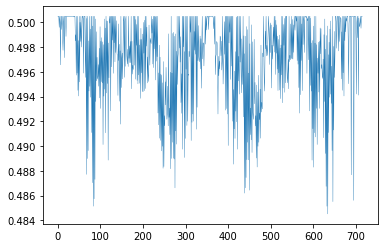

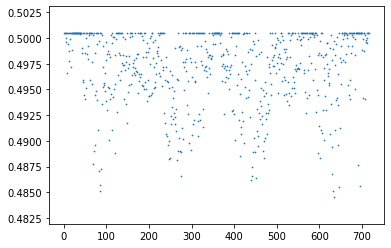

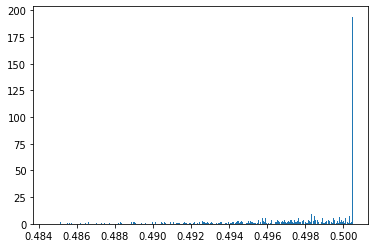

Average value is:  0.4971673
Total Predicted Positive:  430  out of  716
60.05586592178771 %
Epoch:  3
Train on 1 samples, validate on 716 samples
Epoch 1/1
1/1 [==============================] - 1s 645ms/step - loss: 0.6921 - acc: 1.0000 - val_loss: 0.6984 - val_acc: 0.3520
(716, 1)


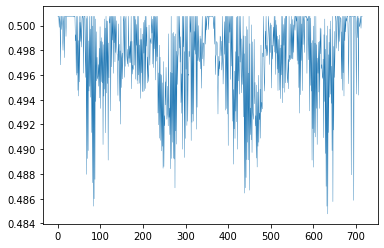

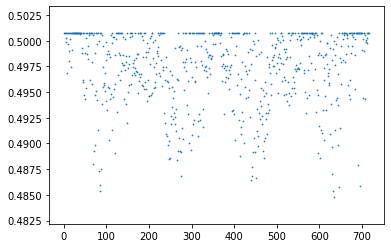

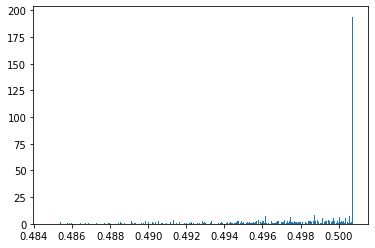

Average value is:  0.49741727
Total Predicted Positive:  430  out of  716
60.05586592178771 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## Dense Model 1
## create the model
modelDense1 = 0
modelDense1 = Sequential()
modelDense1.add(Flatten())
modelDense1.add(Dense(2, activation='relu'))
modelDense1.add(Dense(2, activation='relu'))
modelDense1.add(Dense(1, activation='sigmoid'))
modelDense1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelDense1.build(input_shape) # `input_shape` is the shape of the input data

print(modelDense1.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelDense1.fit(X_train1, y_train1, epochs=1, batch_size=batch_size_user, validation_data = (X_val1, y_val1),verbose=1)

  # Test the model
  y_pred = modelDense1.predict(X_val1)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 60000)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 120002    
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 3         
Total params: 120,011
Trainable params: 120,011
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 145 samples, validate on 572 samples
Epoch 1/1
145/145 [==============================] - 1s 8ms/step - loss: 0.6758 - acc: 0.9793 - val_loss: 0.6576 - val_acc: 1.0000
(572, 1)


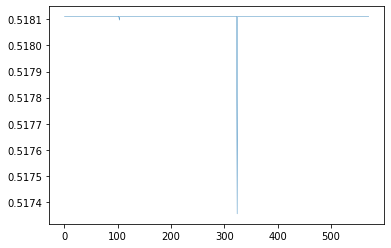

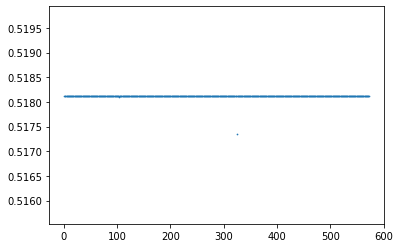

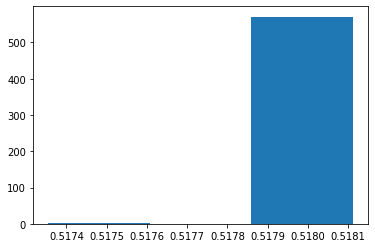

Average value is:  0.5181103
Total Predicted Positive:  570  out of  572
99.65034965034964 %
Epoch:  2
Train on 145 samples, validate on 572 samples
Epoch 1/1
145/145 [==============================] - 1s 5ms/step - loss: 0.6408 - acc: 1.0000 - val_loss: 0.6237 - val_acc: 1.0000
(572, 1)


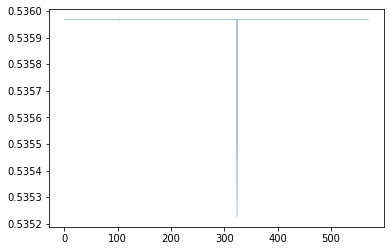

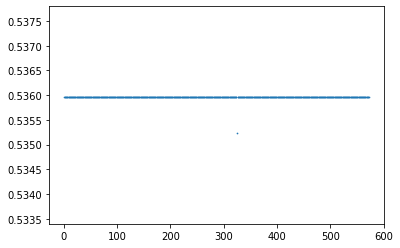

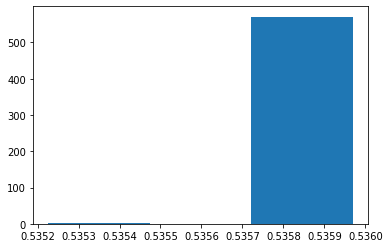

Average value is:  0.5359679
Total Predicted Positive:  570  out of  572
99.65034965034964 %
Epoch:  3
Train on 145 samples, validate on 572 samples
Epoch 1/1
145/145 [==============================] - 1s 6ms/step - loss: 0.6079 - acc: 1.0000 - val_loss: 0.5917 - val_acc: 1.0000
(572, 1)


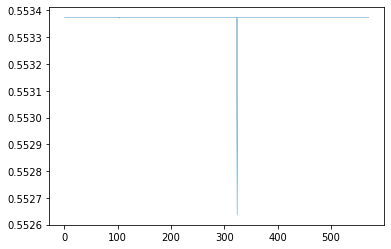

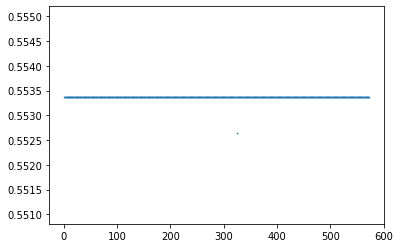

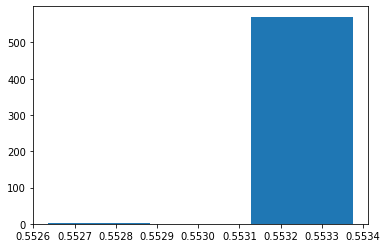

Average value is:  0.55337346
Total Predicted Positive:  570  out of  572
99.65034965034964 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## Dense Model 2
## create the model
modelDense2 = 0
modelDense2 = Sequential()
modelDense2.add(Flatten())
modelDense2.add(Dense(2, activation='relu'))
modelDense2.add(Dense(2, activation='relu'))
modelDense2.add(Dense(1, activation='sigmoid'))
modelDense2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelDense2.build(input_shape) # `input_shape` is the shape of the input data

print(modelDense2.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelDense2.fit(X_train2, y_train2, epochs=1, batch_size=batch_size_user, validation_data = (X_val2, y_val2),verbose=1)

  # Test the model
  y_pred = modelDense2.predict(X_val2)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 60000)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 120002    
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 3         
Total params: 120,011
Trainable params: 120,011
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 289 samples, validate on 428 samples
Epoch 1/1
289/289 [==============================] - 1s 5ms/step - loss: 0.6585 - acc: 0.9896 - val_loss: 0.6242 - val_acc: 1.0000
(428, 1)


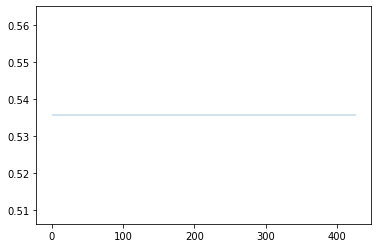

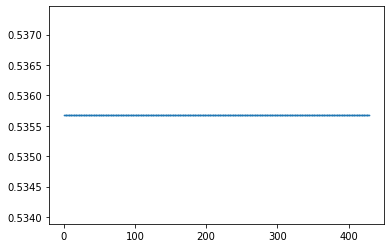

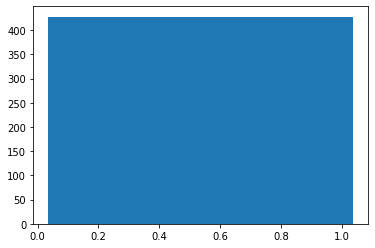

Average value is:  0.53567505
Total Predicted Positive:  428  out of  428
100.0 %
Epoch:  2
Train on 289 samples, validate on 428 samples
Epoch 1/1
289/289 [==============================] - 1s 3ms/step - loss: 0.5931 - acc: 1.0000 - val_loss: 0.5626 - val_acc: 1.0000
(428, 1)


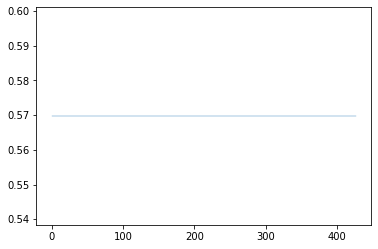

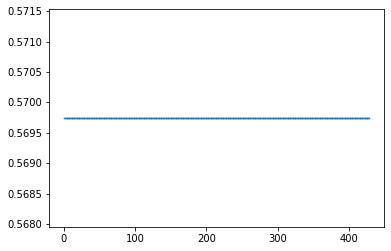

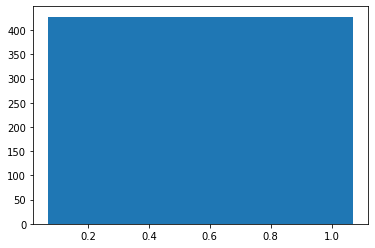

Average value is:  0.56974125
Total Predicted Positive:  0  out of  428
0.0 %
Epoch:  3
Train on 289 samples, validate on 428 samples
Epoch 1/1
289/289 [==============================] - 1s 3ms/step - loss: 0.5348 - acc: 1.0000 - val_loss: 0.5076 - val_acc: 1.0000
(428, 1)


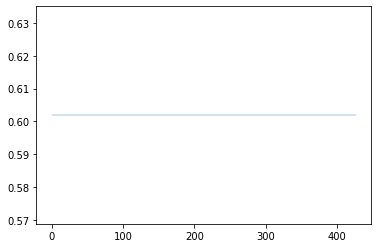

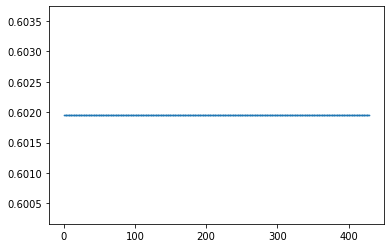

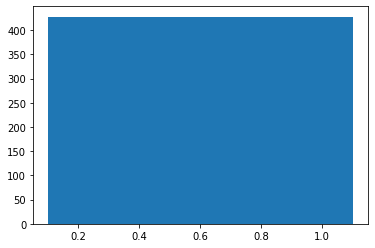

Average value is:  0.6019524
Total Predicted Positive:  0  out of  428
0.0 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## Dense Model 3
## create the model
modelDense3 = 0
modelDense3 = Sequential()
modelDense3.add(Flatten())
modelDense3.add(Dense(2, activation='relu'))
modelDense3.add(Dense(2, activation='relu'))
modelDense3.add(Dense(1, activation='sigmoid'))
modelDense3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelDense3.build(input_shape) # `input_shape` is the shape of the input data

print(modelDense3.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelDense3.fit(X_train3, y_train3, epochs=1, batch_size=batch_size_user, validation_data = (X_val3, y_val3),verbose=1)

  # Test the model
  y_pred = modelDense3.predict(X_val3)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 60000)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 120002    
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 3         
Total params: 120,011
Trainable params: 120,011
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 433 samples, validate on 284 samples
Epoch 1/1
433/433 [==============================] - 2s 4ms/step - loss: 0.6420 - acc: 0.9908 - val_loss: 0.5926 - val_acc: 1.0000
(284, 1)


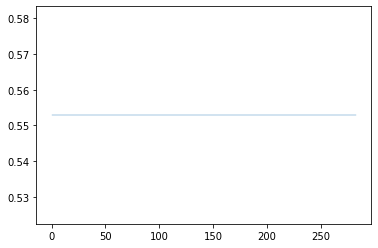

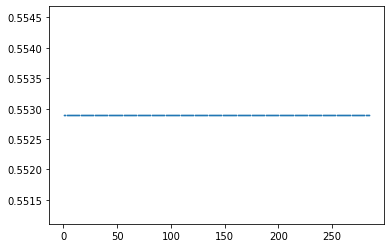

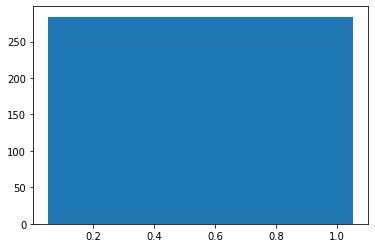

Average value is:  0.5528946
Total Predicted Positive:  284  out of  284
100.0 %
Epoch:  2
Train on 433 samples, validate on 284 samples
Epoch 1/1
433/433 [==============================] - 1s 2ms/step - loss: 0.5492 - acc: 1.0000 - val_loss: 0.5077 - val_acc: 1.0000
(284, 1)


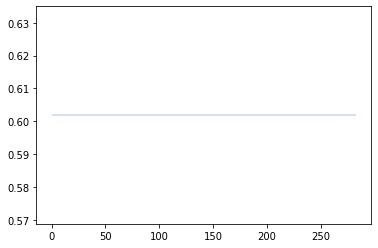

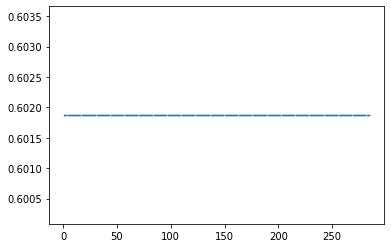

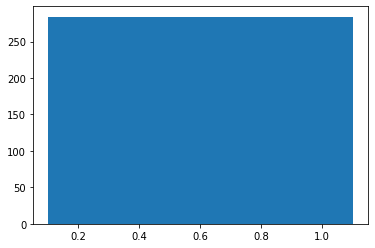

Average value is:  0.60187286
Total Predicted Positive:  284  out of  284
100.0 %
Epoch:  3
Train on 433 samples, validate on 284 samples
Epoch 1/1
433/433 [==============================] - 1s 2ms/step - loss: 0.4712 - acc: 1.0000 - val_loss: 0.4364 - val_acc: 1.0000
(284, 1)


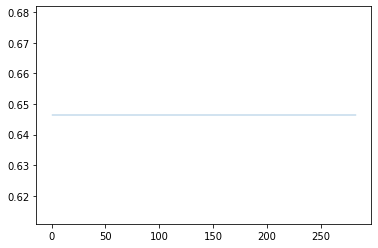

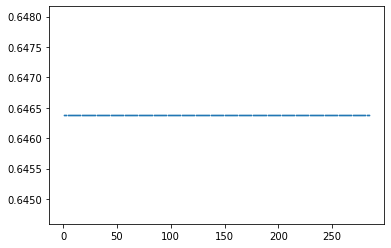

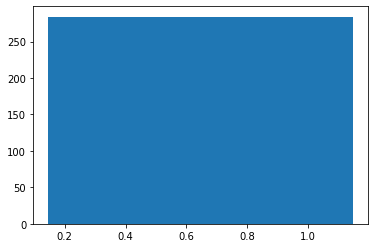

Average value is:  0.64638066
Total Predicted Positive:  284  out of  284
100.0 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## Dense Model 4
## create the model
modelDense4 = 0
modelDense4 = Sequential()
modelDense4.add(Flatten())
modelDense4.add(Dense(2, activation='relu'))
modelDense4.add(Dense(2, activation='relu'))
modelDense4.add(Dense(1, activation='sigmoid'))
modelDense4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelDense4.build(input_shape) # `input_shape` is the shape of the input data

print(modelDense4.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelDense4.fit(X_train4, y_train4, epochs=1, batch_size=batch_size_user, validation_data = (X_val4, y_val4),verbose=1)

  # Test the model
  y_pred = modelDense4.predict(X_val4)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 60000)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 120002    
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 3         
Total params: 120,011
Trainable params: 120,011
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 577 samples, validate on 140 samples
Epoch 1/1
577/577 [==============================] - 2s 3ms/step - loss: 0.6260 - acc: 0.9965 - val_loss: 0.5630 - val_acc: 1.0000
(140, 1)


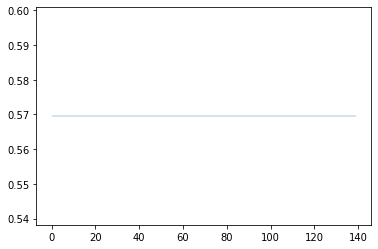

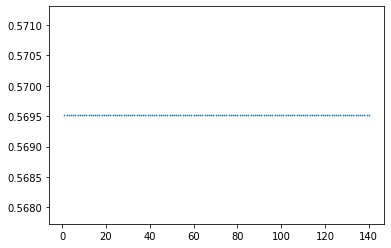

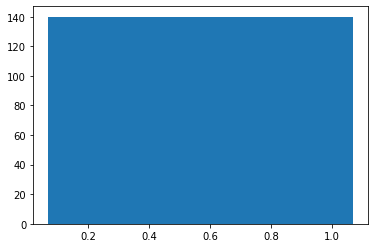

Average value is:  0.56951815
Total Predicted Positive:  140  out of  140
100.0 %
Epoch:  2
Train on 577 samples, validate on 140 samples
Epoch 1/1
577/577 [==============================] - 1s 2ms/step - loss: 0.5094 - acc: 1.0000 - val_loss: 0.4592 - val_acc: 1.0000
(140, 1)


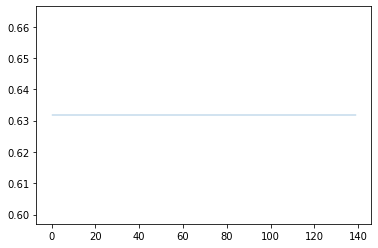

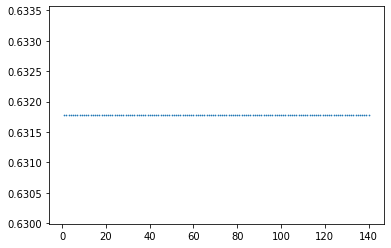

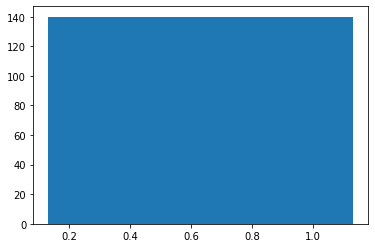

Average value is:  0.6317788
Total Predicted Positive:  140  out of  140
100.0 %
Epoch:  3
Train on 577 samples, validate on 140 samples
Epoch 1/1
577/577 [==============================] - 1s 2ms/step - loss: 0.4167 - acc: 1.0000 - val_loss: 0.3769 - val_acc: 1.0000
(140, 1)


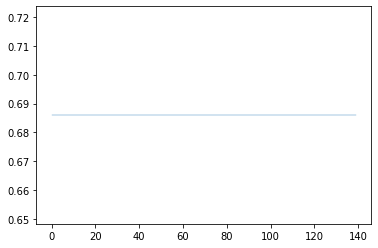

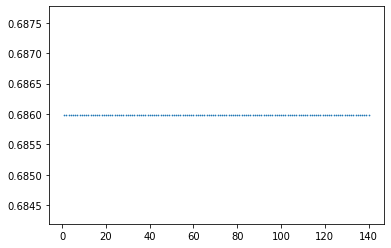

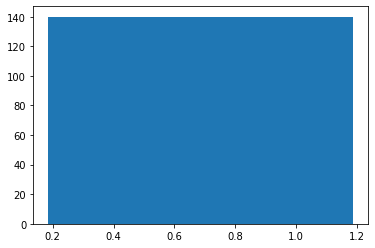

Average value is:  0.68598264
Total Predicted Positive:  140  out of  140
100.0 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## Dense Model 5
## create the model
modelDense5 = 0
modelDense5 = Sequential()
modelDense5.add(Flatten())
modelDense5.add(Dense(2, activation='relu'))
modelDense5.add(Dense(2, activation='relu'))
modelDense5.add(Dense(1, activation='sigmoid'))
modelDense5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelDense5.build(input_shape) # `input_shape` is the shape of the input data

print(modelDense5.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelDense5.fit(X_train5, y_train5, epochs=1, batch_size=batch_size_user, validation_data = (X_val5, y_val5),verbose=1)

  # Test the model
  y_pred = modelDense5.predict(X_val5)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 60000)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 120002    
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 3         
Total params: 120,011
Trainable params: 120,011
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 707 samples, validate on 10 samples
Epoch 1/1
707/707 [==============================] - 2s 3ms/step - loss: 0.6122 - acc: 0.9929 - val_loss: 0.5375 - val_acc: 1.0000
(10, 1)


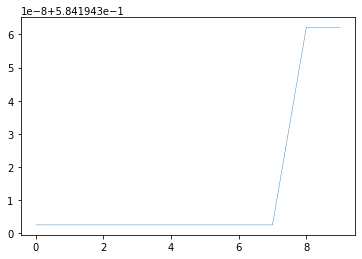

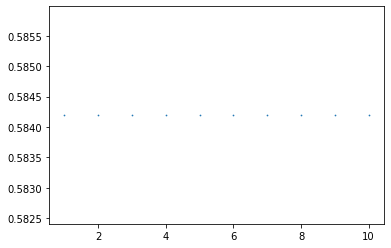

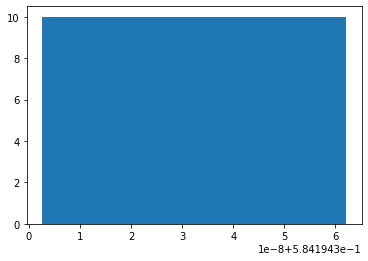

Average value is:  0.5841943
Total Predicted Positive:  10  out of  10
100.0 %
Epoch:  2
Train on 707 samples, validate on 10 samples
Epoch 1/1
707/707 [==============================] - 1s 2ms/step - loss: 0.4761 - acc: 1.0000 - val_loss: 0.4198 - val_acc: 1.0000
(10, 1)


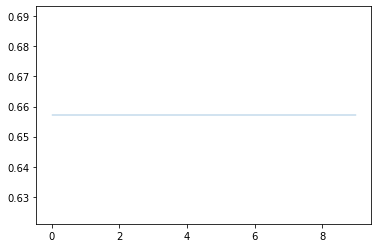

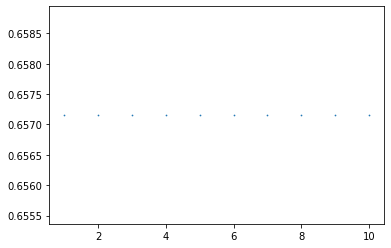

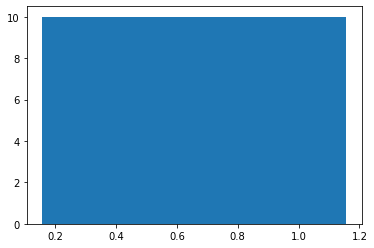

Average value is:  0.6571542
Total Predicted Positive:  10  out of  10
100.0 %
Epoch:  3
Train on 707 samples, validate on 10 samples
Epoch 1/1
707/707 [==============================] - 1s 2ms/step - loss: 0.3736 - acc: 1.0000 - val_loss: 0.3312 - val_acc: 1.0000
(10, 1)


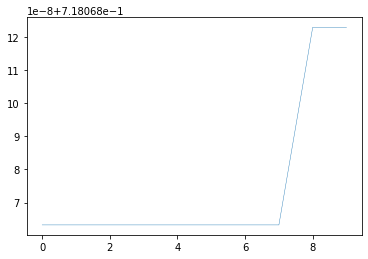

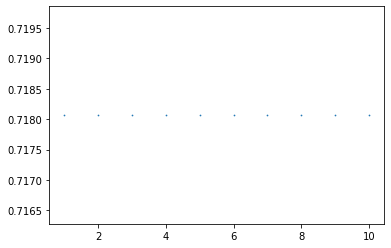

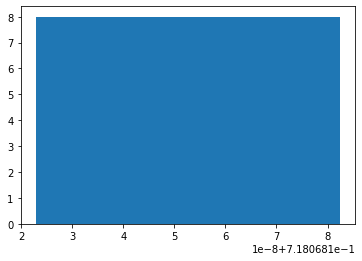

Average value is:  0.71806806
Total Predicted Positive:  10  out of  10
100.0 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## Dense Model 6
## create the model
modelDense6 = 0
modelDense6 = Sequential()
modelDense6.add(Flatten())
modelDense6.add(Dense(2, activation='relu'))
modelDense6.add(Dense(2, activation='relu'))
modelDense6.add(Dense(1, activation='sigmoid'))
modelDense6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelDense6.build(input_shape) # `input_shape` is the shape of the input data

print(modelDense6.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelDense6.fit(X_train6, y_train6, epochs=1, batch_size=batch_size_user, validation_data = (X_val6, y_val6),verbose=1)

  # Test the model
  y_pred = modelDense6.predict(X_val6)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 60000)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 120002    
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 3         
Total params: 120,011
Trainable params: 120,011
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 1 samples, validate on 715 samples
Epoch 1/1
1/1 [==============================] - 1s 1s/step - loss: 0.7137 - acc: 0.0000e+00 - val_loss: 0.6941 - val_acc: 0.7608
(715, 1)


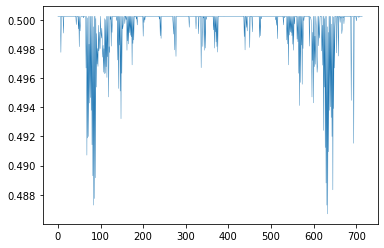

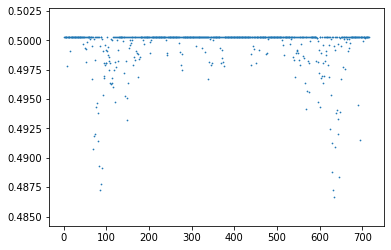

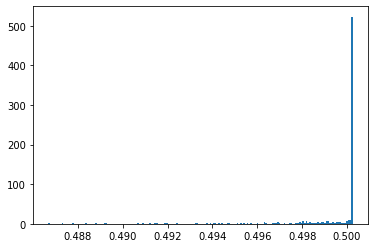

Average value is:  0.49951613
Total Predicted Positive:  570  out of  715
79.72027972027972 %
Epoch:  2
Train on 1 samples, validate on 715 samples
Epoch 1/1
1/1 [==============================] - 1s 744ms/step - loss: 0.6926 - acc: 1.0000 - val_loss: 0.6933 - val_acc: 0.8154
(715, 1)


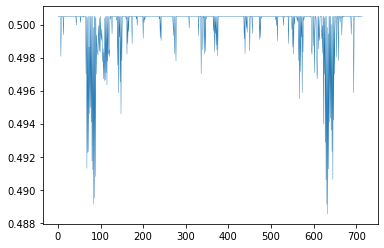

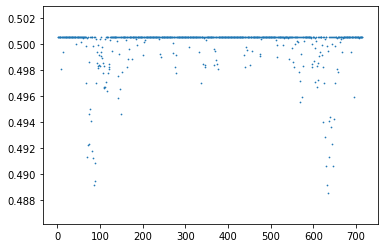

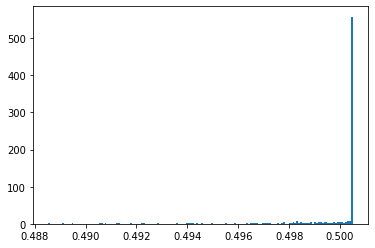

Average value is:  0.49990925
Total Predicted Positive:  590  out of  715
82.51748251748252 %
Epoch:  3
Train on 1 samples, validate on 715 samples
Epoch 1/1
1/1 [==============================] - 1s 633ms/step - loss: 0.6921 - acc: 1.0000 - val_loss: 0.6927 - val_acc: 0.8434
(715, 1)


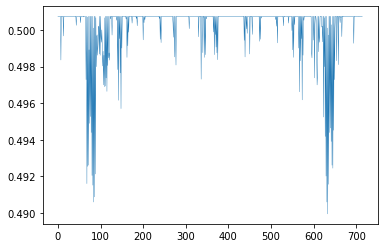

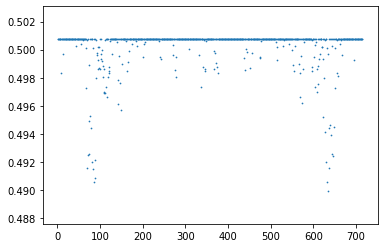

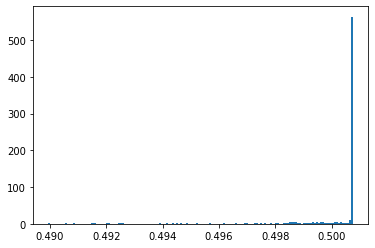

Average value is:  0.5002088
Total Predicted Positive:  591  out of  715
82.65734265734265 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## Dense Model 7
## create the model
modelDense7 = 0
modelDense7 = Sequential()
modelDense7.add(Flatten())
modelDense7.add(Dense(2, activation='relu'))
modelDense7.add(Dense(2, activation='relu'))
modelDense7.add(Dense(1, activation='sigmoid'))
modelDense7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelDense7.build(input_shape) # `input_shape` is the shape of the input data

print(modelDense7.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelDense7.fit(X_train7, y_train7, epochs=1, batch_size=batch_size_user, validation_data = (X_val7, y_val7),verbose=1)

  # Test the model
  y_pred = modelDense7.predict(X_val7)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1

In [0]:
###########################################################################################################################
#------------------------------------------------------------CNN Model-----------------------------------------------#
###########################################################################################################################


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 99, 199, 4)        52        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 99, 4)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 19404)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 19405     
Total params: 19,457
Trainable params: 19,457
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 1 samples, validate on 716 samples
Epoch 1/1
1/1 [==============================] - 7s 7s/step - loss: 0.6687 - acc: 1.0000 - val_loss: 0.6668 - val_acc: 0.7849
(716, 1)


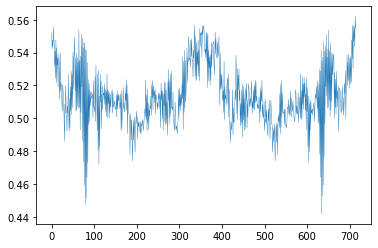

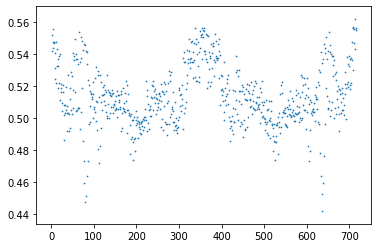

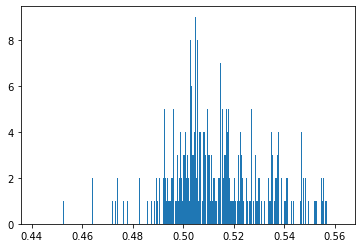

Average value is:  0.5137016
Total Predicted Positive:  327  out of  716
45.67039106145251 %
Epoch:  2
Train on 1 samples, validate on 716 samples
Epoch 1/1
1/1 [==============================] - 1s 673ms/step - loss: 0.5893 - acc: 1.0000 - val_loss: 0.5980 - val_acc: 0.9860
(716, 1)


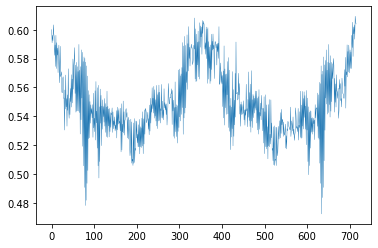

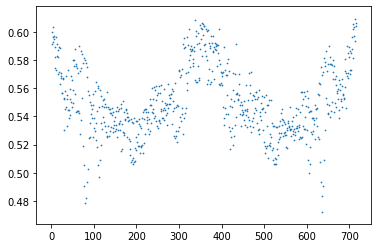

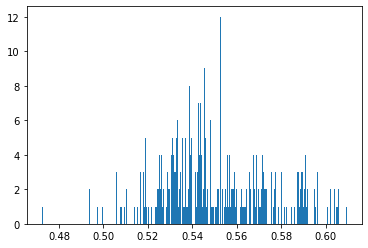

Average value is:  0.55044705
Total Predicted Positive:  312  out of  716
43.575418994413404 %
Epoch:  3
Train on 1 samples, validate on 716 samples
Epoch 1/1
1/1 [==============================] - 1s 646ms/step - loss: 0.5039 - acc: 1.0000 - val_loss: 0.5252 - val_acc: 1.0000
(716, 1)


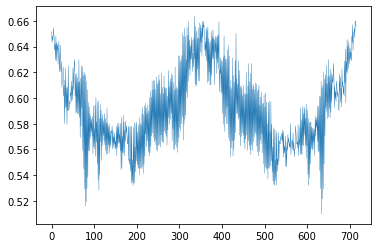

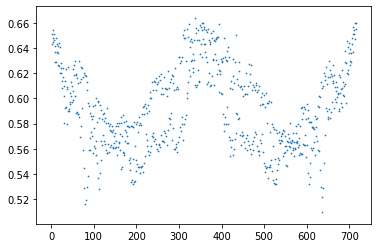

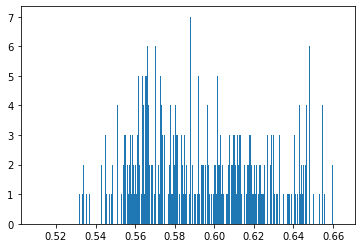

Average value is:  0.592321
Total Predicted Positive:  341  out of  716
47.625698324022345 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## CNN Model 1
## create the model
modelCNN1 = 0
modelCNN1 = Sequential()
modelCNN1.add(Conv2D(4, kernel_size=(2, 2),activation='relu'))
modelCNN1.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN1.add(Flatten())
modelCNN1.add(Dense(1, activation='sigmoid'))
modelCNN1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelCNN1.build(input_shape) # `input_shape` is the shape of the input data

print(modelCNN1.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelCNN1.fit(X_train1, y_train1, epochs=1, batch_size=batch_size_user, validation_data = (X_val1, y_val1),verbose=1)

  # Test the model
  y_pred = modelCNN1.predict(X_val1)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 99, 199, 4)        52        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 99, 4)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 19404)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 19405     
Total params: 19,457
Trainable params: 19,457
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 145 samples, validate on 572 samples
Epoch 1/1
145/145 [==============================] - 2s 12ms/step - loss: 0.0686 - acc: 0.9862 - val_loss: 2.3235e-05 - val_acc: 1.0000
(572, 1)


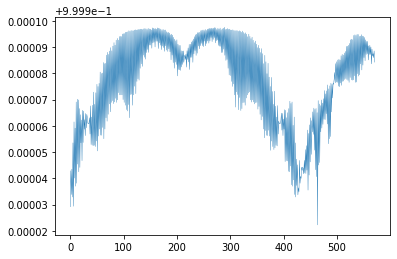

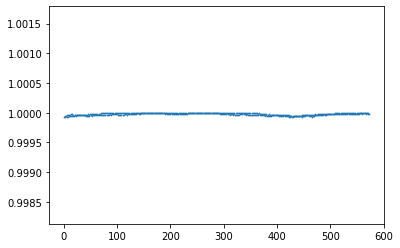

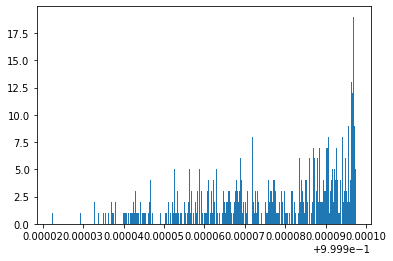

Average value is:  0.99997675
Total Predicted Positive:  317  out of  572
55.41958041958041 %
Epoch:  2
Train on 145 samples, validate on 572 samples
Epoch 1/1
145/145 [==============================] - 1s 6ms/step - loss: 2.5031e-05 - acc: 1.0000 - val_loss: 1.7869e-05 - val_acc: 1.0000
(572, 1)


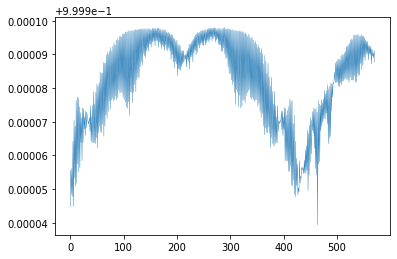

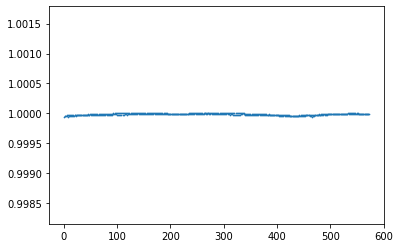

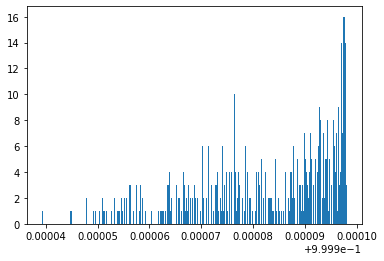

Average value is:  0.99998206
Total Predicted Positive:  317  out of  572
55.41958041958041 %
Epoch:  3
Train on 145 samples, validate on 572 samples
Epoch 1/1
145/145 [==============================] - 1s 6ms/step - loss: 1.9874e-05 - acc: 1.0000 - val_loss: 1.4042e-05 - val_acc: 1.0000
(572, 1)


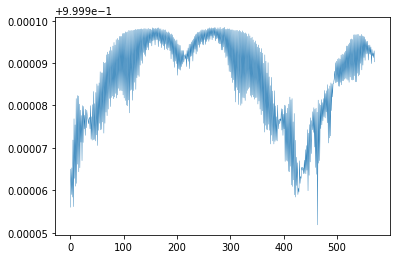

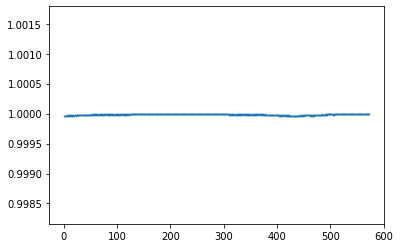

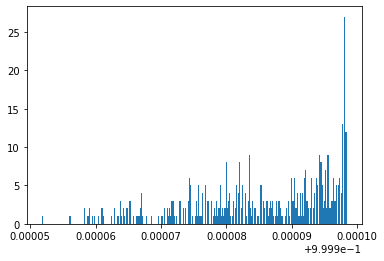

Average value is:  0.999986
Total Predicted Positive:  315  out of  572
55.069930069930074 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## CNN Model 2
## create the model
modelCNN2 = 0
modelCNN2 = Sequential()
modelCNN2.add(Conv2D(4, kernel_size=(2, 2),activation='relu'))
modelCNN2.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN2.add(Flatten())
modelCNN2.add(Dense(1, activation='sigmoid'))
modelCNN2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelCNN2.build(input_shape) # `input_shape` is the shape of the input data

print(modelCNN2.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelCNN2.fit(X_train2, y_train2, epochs=1, batch_size=batch_size_user, validation_data = (X_val2, y_val2),verbose=1)

  # Test the model
  y_pred = modelCNN2.predict(X_val2)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 99, 199, 4)        52        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 99, 4)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 19404)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 19405     
Total params: 19,457
Trainable params: 19,457
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 289 samples, validate on 428 samples
Epoch 1/1
289/289 [==============================] - 2s 7ms/step - loss: 0.0401 - acc: 0.9965 - val_loss: 1.5496e-05 - val_acc: 1.0000
(428, 1)


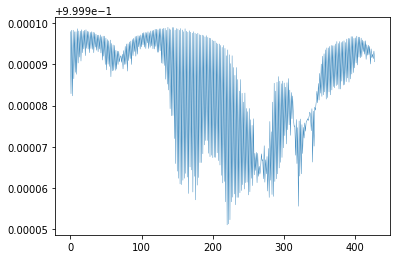

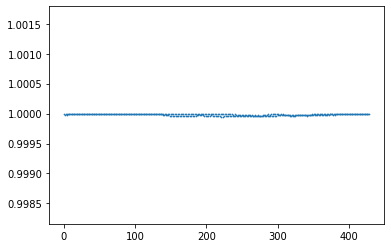

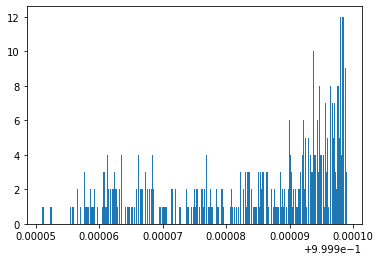

Average value is:  0.99998444
Total Predicted Positive:  263  out of  428
61.44859813084113 %
Epoch:  2
Train on 289 samples, validate on 428 samples
Epoch 1/1
289/289 [==============================] - 1s 3ms/step - loss: 1.7884e-05 - acc: 1.0000 - val_loss: 1.1394e-05 - val_acc: 1.0000
(428, 1)


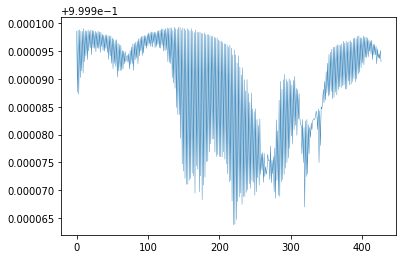

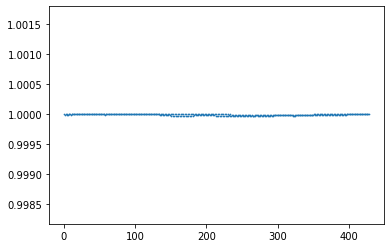

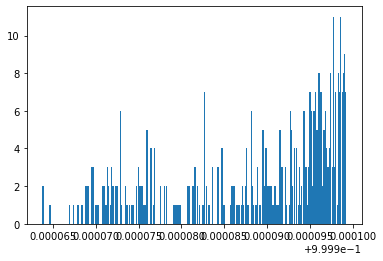

Average value is:  0.9999886
Total Predicted Positive:  262  out of  428
61.21495327102804 %
Epoch:  3
Train on 289 samples, validate on 428 samples
Epoch 1/1
289/289 [==============================] - 1s 3ms/step - loss: 1.3067e-05 - acc: 1.0000 - val_loss: 8.2962e-06 - val_acc: 1.0000
(428, 1)


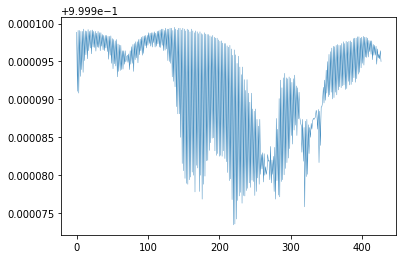

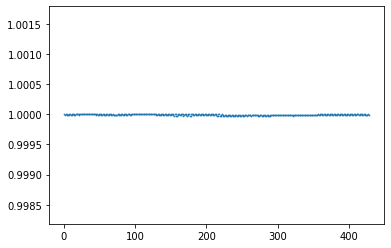

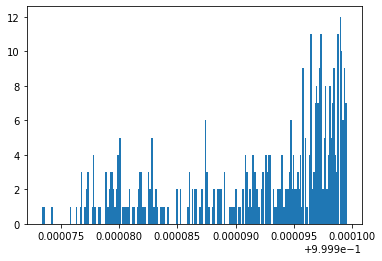

Average value is:  0.99999166
Total Predicted Positive:  265  out of  428
61.915887850467286 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## CNN Model 3
## create the model
modelCNN3 = 0
modelCNN3 = Sequential()
modelCNN3.add(Conv2D(4, kernel_size=(2, 2),activation='relu'))
modelCNN3.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN3.add(Flatten())
modelCNN3.add(Dense(1, activation='sigmoid'))
modelCNN3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelCNN3.build(input_shape) # `input_shape` is the shape of the input data

print(modelCNN3.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelCNN3.fit(X_train3, y_train3, epochs=1, batch_size=batch_size_user, validation_data = (X_val3, y_val3),verbose=1)

  # Test the model
  y_pred = modelCNN3.predict(X_val3)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 99, 199, 4)        52        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 99, 4)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 19404)             0         
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 19405     
Total params: 19,457
Trainable params: 19,457
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 433 samples, validate on 284 samples
Epoch 1/1
433/433 [==============================] - 2s 5ms/step - loss: 0.0258 - acc: 0.9954 - val_loss: 2.6917e-05 - val_acc: 1.0000
(284, 1)


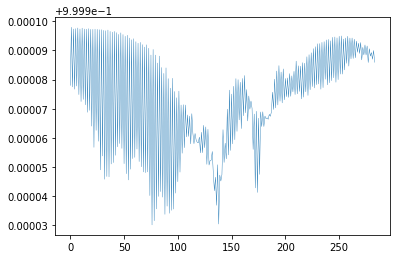

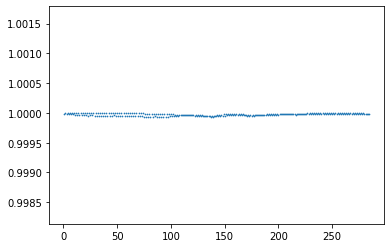

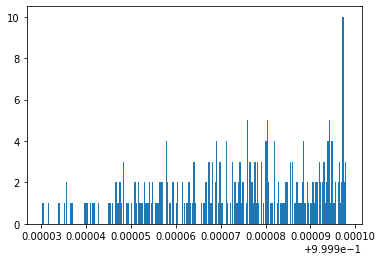

Average value is:  0.9999731
Total Predicted Positive:  157  out of  284
55.28169014084507 %
Epoch:  2
Train on 433 samples, validate on 284 samples
Epoch 1/1
433/433 [==============================] - 1s 3ms/step - loss: 1.6636e-05 - acc: 1.0000 - val_loss: 1.4830e-05 - val_acc: 1.0000
(284, 1)


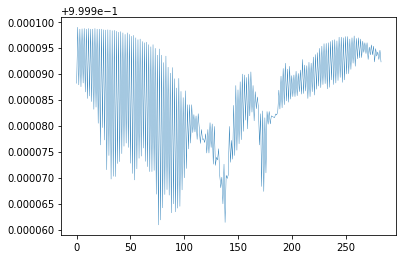

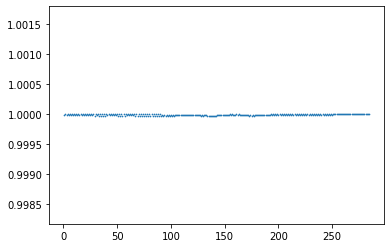

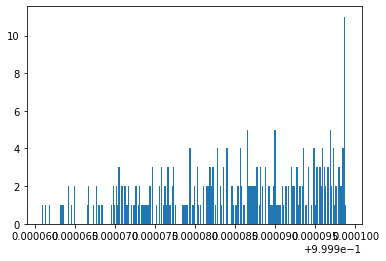

Average value is:  0.99998516
Total Predicted Positive:  159  out of  284
55.98591549295775 %
Epoch:  3
Train on 433 samples, validate on 284 samples
Epoch 1/1
433/433 [==============================] - 1s 3ms/step - loss: 9.4586e-06 - acc: 1.0000 - val_loss: 8.8207e-06 - val_acc: 1.0000
(284, 1)


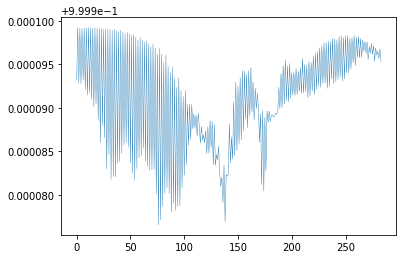

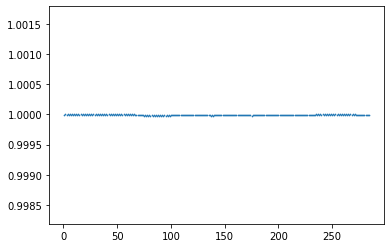

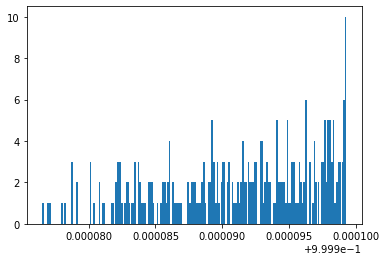

Average value is:  0.9999912
Total Predicted Positive:  159  out of  284
55.98591549295775 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## CNN Model 4
## create the model
modelCNN4 = 0
modelCNN4 = Sequential()
modelCNN4.add(Conv2D(4, kernel_size=(2, 2),activation='relu'))
modelCNN4.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN4.add(Flatten())
modelCNN4.add(Dense(1, activation='sigmoid'))
modelCNN4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelCNN4.build(input_shape) # `input_shape` is the shape of the input data

print(modelCNN4.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelCNN4.fit(X_train4, y_train4, epochs=1, batch_size=batch_size_user, validation_data = (X_val4, y_val4),verbose=1)

  # Test the model
  y_pred = modelCNN4.predict(X_val4)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 99, 199, 4)        52        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 99, 4)         0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 19404)             0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 19405     
Total params: 19,457
Trainable params: 19,457
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 577 samples, validate on 140 samples
Epoch 1/1
577/577 [==============================] - 2s 4ms/step - loss: 0.0164 - acc: 0.9965 - val_loss: 1.8563e-05 - val_acc: 1.0000
(140, 1)


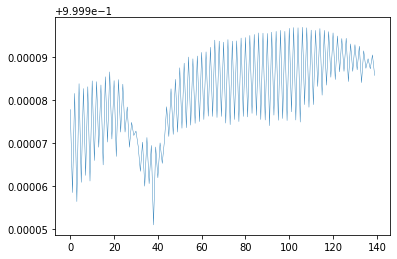

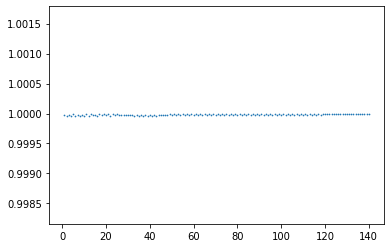

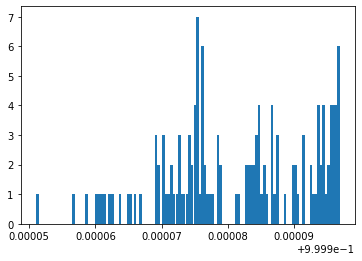

Average value is:  0.99998146
Total Predicted Positive:  72  out of  140
51.42857142857142 %
Epoch:  2
Train on 577 samples, validate on 140 samples
Epoch 1/1
577/577 [==============================] - 1s 2ms/step - loss: 1.5845e-05 - acc: 1.0000 - val_loss: 8.6589e-06 - val_acc: 1.0000
(140, 1)


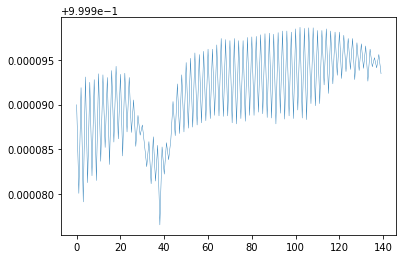

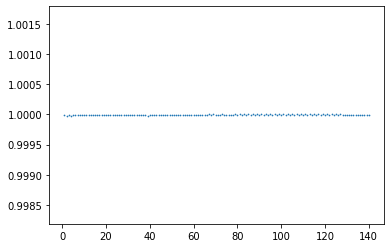

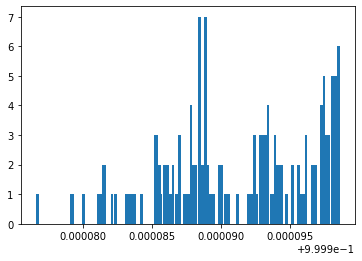

Average value is:  0.9999913
Total Predicted Positive:  72  out of  140
51.42857142857142 %
Epoch:  3
Train on 577 samples, validate on 140 samples
Epoch 1/1
577/577 [==============================] - 1s 2ms/step - loss: 8.0722e-06 - acc: 1.0000 - val_loss: 4.8348e-06 - val_acc: 1.0000
(140, 1)


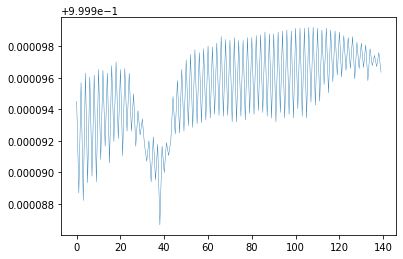

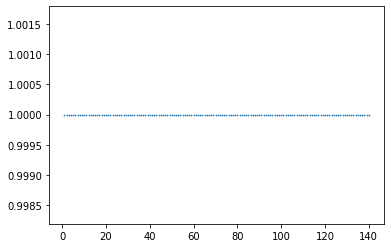

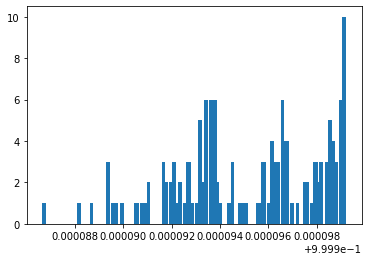

Average value is:  0.99999523
Total Predicted Positive:  72  out of  140
51.42857142857142 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## CNN Model 5
## create the model
modelCNN5 = 0
modelCNN5 = Sequential()
modelCNN5.add(Conv2D(4, kernel_size=(2, 2),activation='relu'))
modelCNN5.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN5.add(Flatten())
modelCNN5.add(Dense(1, activation='sigmoid'))
modelCNN5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelCNN5.build(input_shape) # `input_shape` is the shape of the input data

print(modelCNN5.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelCNN5.fit(X_train5, y_train5, epochs=1, batch_size=batch_size_user, validation_data = (X_val5, y_val5),verbose=1)

  # Test the model
  y_pred = modelCNN5.predict(X_val5)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 99, 199, 4)        52        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 99, 4)         0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 19404)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 19405     
Total params: 19,457
Trainable params: 19,457
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 707 samples, validate on 10 samples
Epoch 1/1
707/707 [==============================] - 2s 3ms/step - loss: 0.0145 - acc: 0.9986 - val_loss: 6.6281e-06 - val_acc: 1.0000
(10, 1)


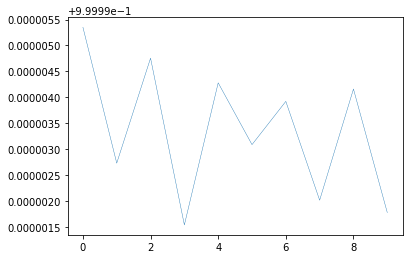

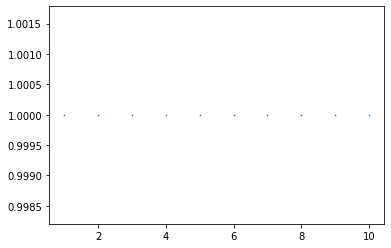

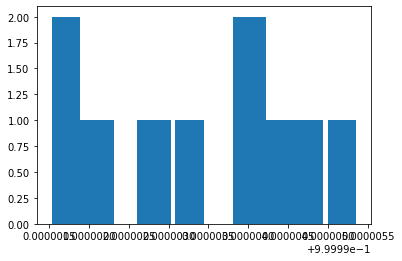

Average value is:  0.9999933
Total Predicted Positive:  5  out of  10
50.0 %
Epoch:  2
Train on 707 samples, validate on 10 samples
Epoch 1/1
707/707 [==============================] - 1s 2ms/step - loss: 9.3380e-06 - acc: 1.0000 - val_loss: 2.8729e-06 - val_acc: 1.0000
(10, 1)


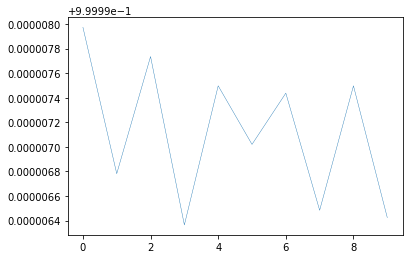

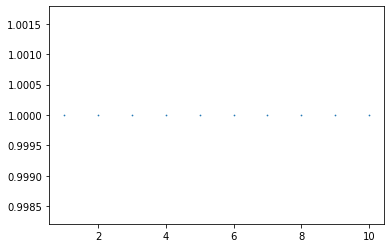

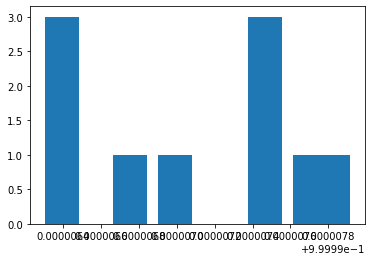

Average value is:  0.999997
Total Predicted Positive:  6  out of  10
60.0 %
Epoch:  3
Train on 707 samples, validate on 10 samples
Epoch 1/1
707/707 [==============================] - 2s 2ms/step - loss: 4.4065e-06 - acc: 1.0000 - val_loss: 1.5140e-06 - val_acc: 1.0000
(10, 1)


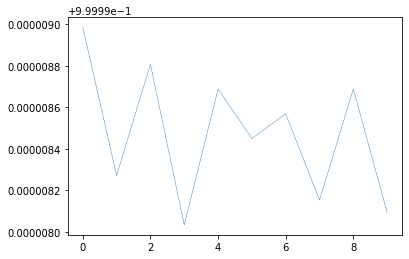

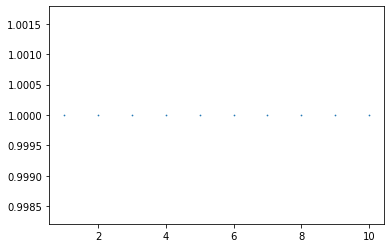

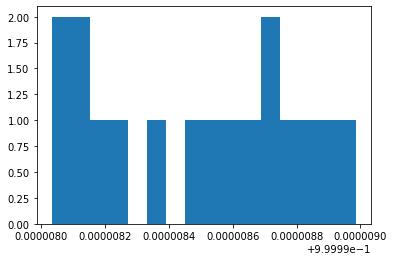

Average value is:  0.99999845
Total Predicted Positive:  6  out of  10
60.0 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## CNN Model 6
## create the model
modelCNN6 = 0
modelCNN6 = Sequential()
modelCNN6.add(Conv2D(4, kernel_size=(2, 2),activation='relu'))
modelCNN6.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN6.add(Flatten())
modelCNN6.add(Dense(1, activation='sigmoid'))
modelCNN6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelCNN6.build(input_shape) # `input_shape` is the shape of the input data

print(modelCNN6.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelCNN6.fit(X_train6, y_train6, epochs=1, batch_size=batch_size_user, validation_data = (X_val6, y_val6),verbose=1)

  # Test the model
  y_pred = modelCNN6.predict(X_val6)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 99, 199, 4)        52        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 49, 99, 4)         0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 19404)             0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 19405     
Total params: 19,457
Trainable params: 19,457
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 1 samples, validate on 715 samples
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.6746 - acc: 1.0000 - val_loss: 0.6821 - val_acc: 0.6098
(715, 1)


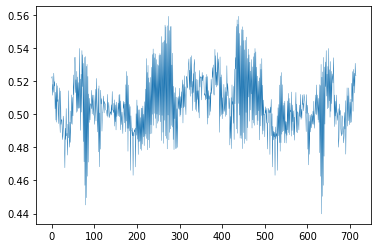

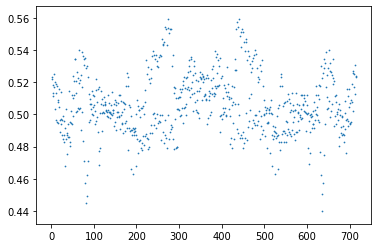

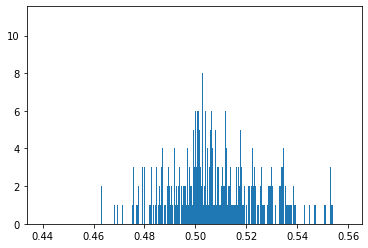

Average value is:  0.50587195
Total Predicted Positive:  327  out of  715
45.73426573426573 %
Epoch:  2
Train on 1 samples, validate on 715 samples
Epoch 1/1
1/1 [==============================] - 1s 708ms/step - loss: 0.5955 - acc: 1.0000 - val_loss: 0.6387 - val_acc: 0.9552
(715, 1)


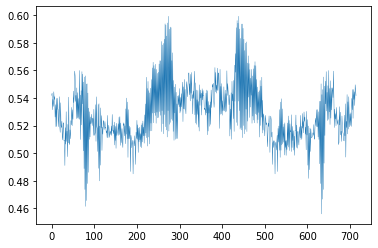

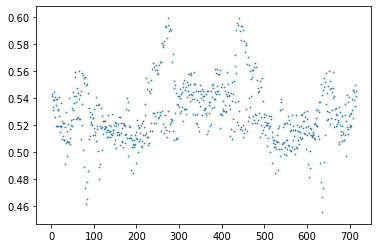

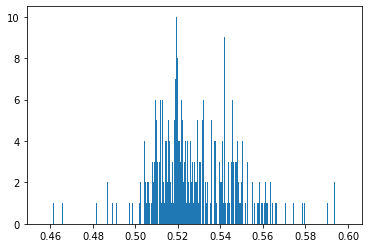

Average value is:  0.52840835
Total Predicted Positive:  310  out of  715
43.35664335664335 %
Epoch:  3
Train on 1 samples, validate on 715 samples
Epoch 1/1
1/1 [==============================] - 1s 672ms/step - loss: 0.5215 - acc: 1.0000 - val_loss: 0.5956 - val_acc: 0.9860
(715, 1)


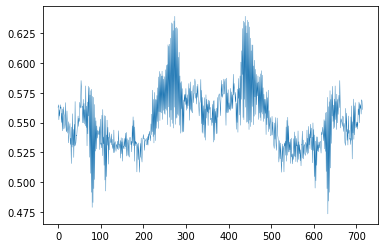

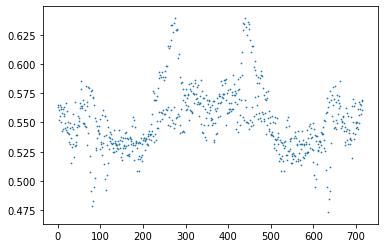

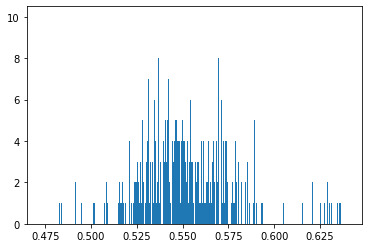

Average value is:  0.55180705
Total Predicted Positive:  327  out of  715
45.73426573426573 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## CNN Model 7
## create the model
modelCNN7 = 0
modelCNN7 = Sequential()
modelCNN7.add(Conv2D(4, kernel_size=(2, 2),activation='relu'))
modelCNN7.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN7.add(Flatten())
modelCNN7.add(Dense(1, activation='sigmoid'))
modelCNN7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelCNN7.build(input_shape) # `input_shape` is the shape of the input data

print(modelCNN7.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelCNN7.fit(X_train7, y_train7, epochs=1, batch_size=batch_size_user, validation_data = (X_val7, y_val7),verbose=1)

  # Test the model
  y_pred = modelCNN7.predict(X_val7)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1

In [0]:
###########################################################################################################################
#------------------------------------------------------------RNN Model-----------------------------------------------#
###########################################################################################################################

In [0]:
# User defined parameters, for RNN particularly
# https://datascience.stackexchange.com/questions/20442/recurrent-neural-network-producing-same-predictions
# Has suggested that increasing batch size will help RNN stop predicting the same value for all
batch_size_user = 150
#epoch_user = 1
#times_to_loop_model = 5

print("User defined parameters set")
print(batch_size_user)
print(epoch_user)
print(times_to_loop_model)

User defined parameters set
150
1
3


In [0]:
print(input_shape)
print(flatten_shape)

(None, 100, 200, 3)
(None, 20000, 3)


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 20000, 2)          56        
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 2)                 48        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 3         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 1 samples, validate on 716 samples
Epoch 1/1
1/1 [==============================] - 5s 5s/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6903 - val_acc: 1.0000
(716, 1)


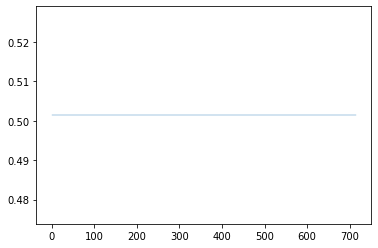

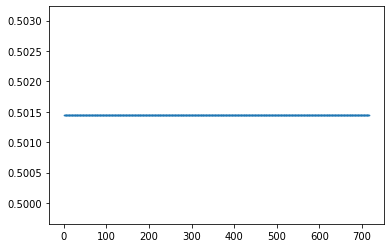

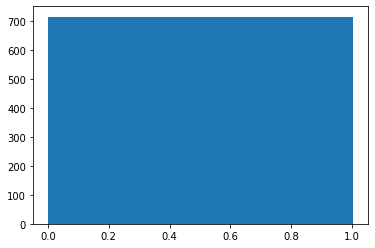

Average value is:  0.50144595
Total Predicted Positive:  716  out of  716
100.0 %
Epoch:  2
Train on 1 samples, validate on 716 samples
Epoch 1/1
1/1 [==============================] - 4s 4s/step - loss: 0.6903 - acc: 1.0000 - val_loss: 0.6869 - val_acc: 1.0000
(716, 1)


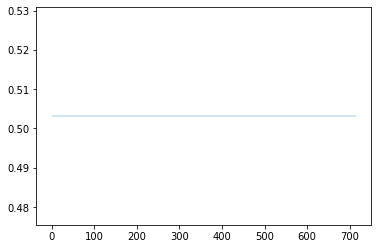

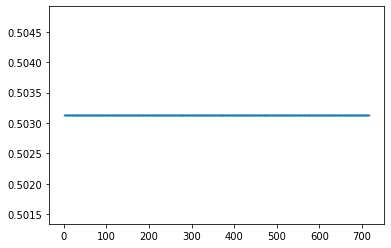

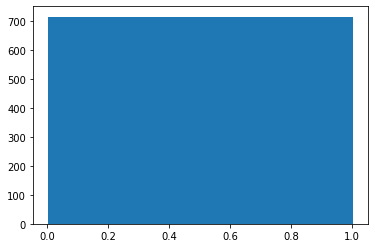

Average value is:  0.503129
Total Predicted Positive:  0  out of  716
0.0 %
Epoch:  3
Train on 1 samples, validate on 716 samples
Epoch 1/1
1/1 [==============================] - 4s 4s/step - loss: 0.6869 - acc: 1.0000 - val_loss: 0.6833 - val_acc: 1.0000
(716, 1)


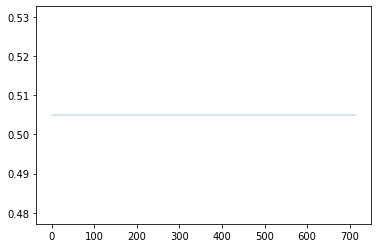

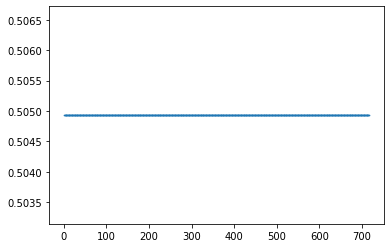

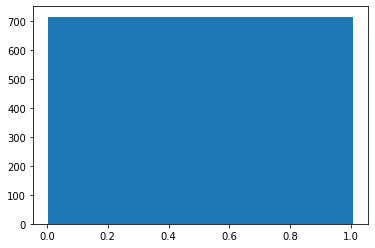

Average value is:  0.504932
Total Predicted Positive:  716  out of  716
100.0 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## RNN Model 1
## create the model
modelRNNLSTM1 = 0
modelRNNLSTM1 = Sequential()
modelRNNLSTM1.add(cudnn_recurrent.CuDNNLSTM(units=2, input_shape=(flatten_value,3),return_sequences=True))
modelRNNLSTM1.add(cudnn_recurrent.CuDNNLSTM(units=2))
modelRNNLSTM1.add(Dense(1, activation='sigmoid'))
modelRNNLSTM1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelRNNLSTM1.build(flatten_shape) # `input_shape` is the shape of the input data

print(modelRNNLSTM1.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelRNNLSTM1.fit(X_train1_flatten, y_train1, epochs=1, batch_size=batch_size_user, validation_data = (X_val1_flatten, y_val1),verbose=1)

  # Test the model
  y_pred = modelRNNLSTM1.predict(X_val1_flatten)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_3 (CuDNNLSTM)     (None, 20000, 2)          56        
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 2)                 48        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 3         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 145 samples, validate on 572 samples
Epoch 1/1
145/145 [==============================] - 5s 34ms/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6893 - val_acc: 1.0000
(572, 1)


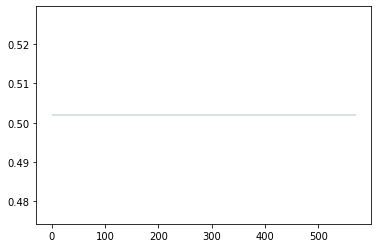

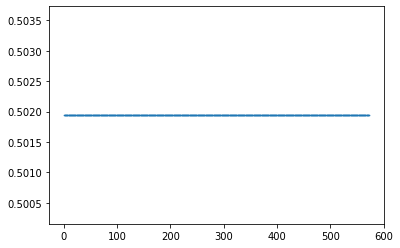

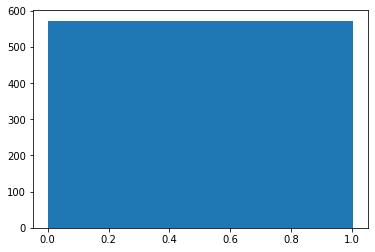

Average value is:  0.50194305
Total Predicted Positive:  0  out of  572
0.0 %
Epoch:  2
Train on 145 samples, validate on 572 samples
Epoch 1/1
145/145 [==============================] - 4s 24ms/step - loss: 0.6893 - acc: 1.0000 - val_loss: 0.6854 - val_acc: 1.0000
(572, 1)


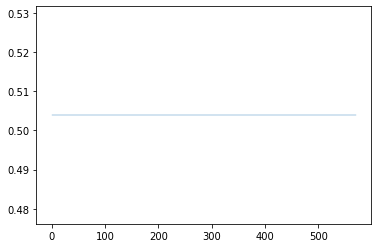

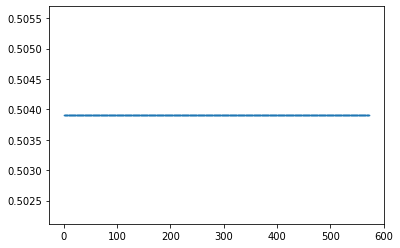

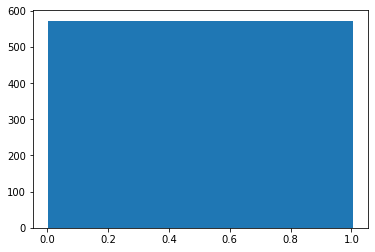

Average value is:  0.5039071
Total Predicted Positive:  572  out of  572
100.0 %
Epoch:  3
Train on 145 samples, validate on 572 samples
Epoch 1/1
145/145 [==============================] - 3s 23ms/step - loss: 0.6854 - acc: 1.0000 - val_loss: 0.6814 - val_acc: 1.0000
(572, 1)


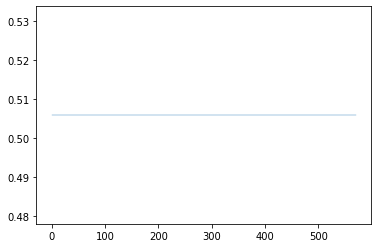

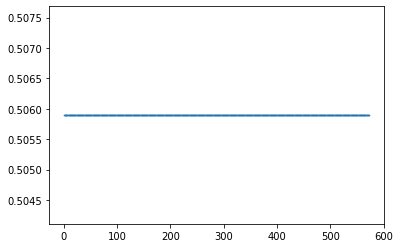

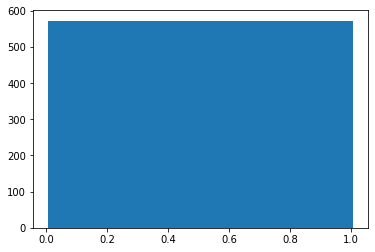

Average value is:  0.5058964
Total Predicted Positive:  572  out of  572
100.0 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## RNN Model 2
## create the model
modelRNNLSTM2 = 0
modelRNNLSTM2 = Sequential()
modelRNNLSTM2.add(cudnn_recurrent.CuDNNLSTM(units=2, input_shape=(flatten_value,3),return_sequences=True))
modelRNNLSTM2.add(cudnn_recurrent.CuDNNLSTM(units=2))
modelRNNLSTM2.add(Dense(1, activation='sigmoid'))
modelRNNLSTM2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelRNNLSTM2.build(flatten_shape) # `input_shape` is the shape of the input data

print(modelRNNLSTM2.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelRNNLSTM2.fit(X_train2_flatten, y_train2, epochs=1, batch_size=batch_size_user, validation_data = (X_val2_flatten, y_val2),verbose=1)

  # Test the model
  y_pred = modelRNNLSTM2.predict(X_val2_flatten)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_5 (CuDNNLSTM)     (None, 20000, 2)          56        
_________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)     (None, 2)                 48        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 3         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 289 samples, validate on 428 samples
Epoch 1/1
289/289 [==============================] - 6s 19ms/step - loss: 0.6913 - acc: 0.4810 - val_loss: 0.6854 - val_acc: 1.0000
(428, 1)


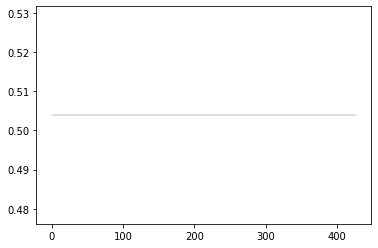

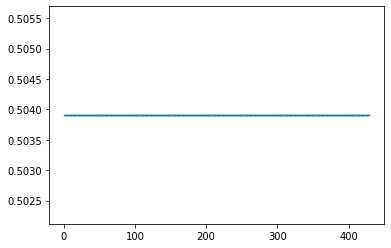

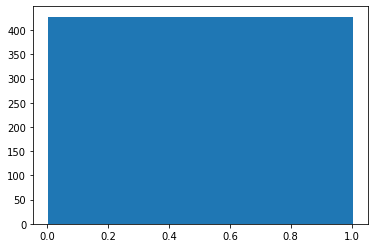

Average value is:  0.5039072
Total Predicted Positive:  0  out of  428
0.0 %
Epoch:  2
Train on 289 samples, validate on 428 samples
Epoch 1/1
289/289 [==============================] - 4s 13ms/step - loss: 0.6835 - acc: 1.0000 - val_loss: 0.6774 - val_acc: 1.0000
(428, 1)


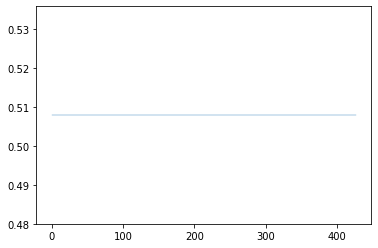

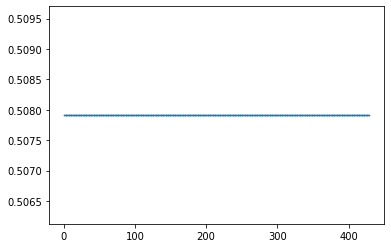

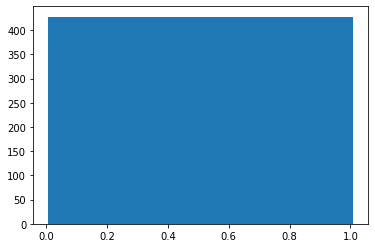

Average value is:  0.50791174
Total Predicted Positive:  428  out of  428
100.0 %
Epoch:  3
Train on 289 samples, validate on 428 samples
Epoch 1/1
289/289 [==============================] - 4s 13ms/step - loss: 0.6755 - acc: 1.0000 - val_loss: 0.6694 - val_acc: 1.0000
(428, 1)


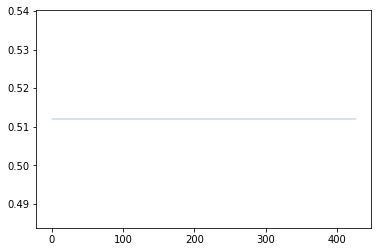

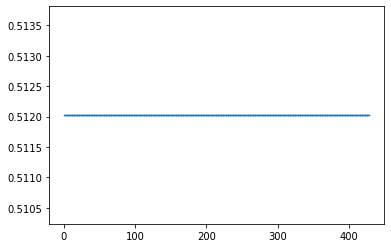

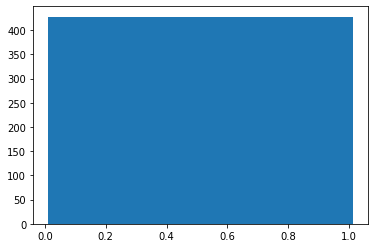

Average value is:  0.512024
Total Predicted Positive:  428  out of  428
100.0 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## RNN Model 3
## create the model
modelRNNLSTM3 = 0
modelRNNLSTM3 = Sequential()
modelRNNLSTM3.add(cudnn_recurrent.CuDNNLSTM(units=2, input_shape=(flatten_value,3),return_sequences=True))
modelRNNLSTM3.add(cudnn_recurrent.CuDNNLSTM(units=2))
modelRNNLSTM3.add(Dense(1, activation='sigmoid'))
modelRNNLSTM3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelRNNLSTM3.build(flatten_shape) # `input_shape` is the shape of the input data

print(modelRNNLSTM3.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelRNNLSTM3.fit(X_train3_flatten, y_train3, epochs=1, batch_size=batch_size_user, validation_data = (X_val3_flatten, y_val3),verbose=1)

  # Test the model
  y_pred = modelRNNLSTM3.predict(X_val3_flatten)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_7 (CuDNNLSTM)     (None, 20000, 2)          56        
_________________________________________________________________
cu_dnnlstm_8 (CuDNNLSTM)     (None, 2)                 48        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 3         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 433 samples, validate on 284 samples
Epoch 1/1
433/433 [==============================] - 6s 14ms/step - loss: 0.6894 - acc: 0.6536 - val_loss: 0.6814 - val_acc: 1.0000
(284, 1)


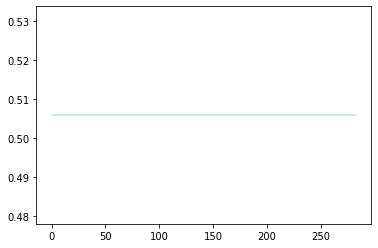

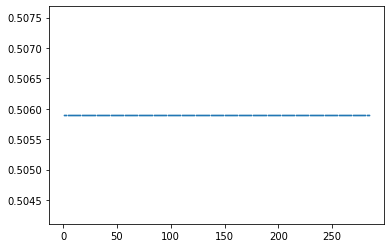

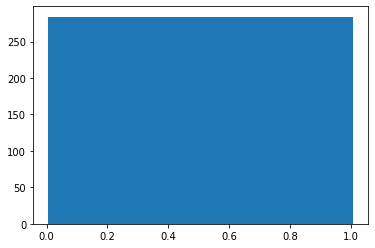

Average value is:  0.50589645
Total Predicted Positive:  0  out of  284
0.0 %
Epoch:  2
Train on 433 samples, validate on 284 samples
Epoch 1/1
433/433 [==============================] - 4s 10ms/step - loss: 0.6776 - acc: 1.0000 - val_loss: 0.6694 - val_acc: 1.0000
(284, 1)


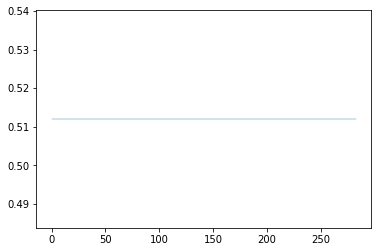

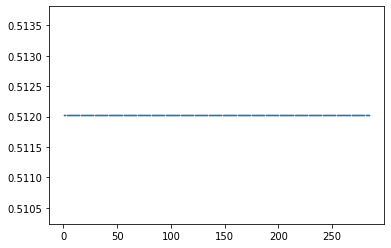

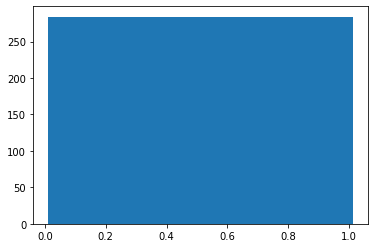

Average value is:  0.512024
Total Predicted Positive:  284  out of  284
100.0 %
Epoch:  3
Train on 433 samples, validate on 284 samples
Epoch 1/1
433/433 [==============================] - 4s 10ms/step - loss: 0.6654 - acc: 1.0000 - val_loss: 0.6570 - val_acc: 1.0000
(284, 1)


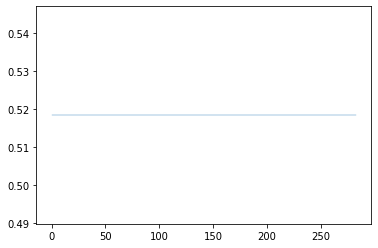

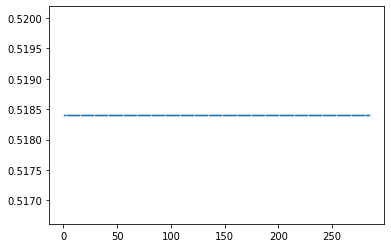

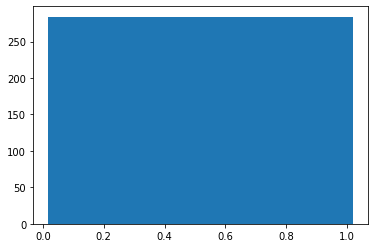

Average value is:  0.5184023
Total Predicted Positive:  284  out of  284
100.0 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## RNN Model 4
## create the model
modelRNNLSTM4 = 0
modelRNNLSTM4 = Sequential()
modelRNNLSTM4.add(cudnn_recurrent.CuDNNLSTM(units=2, input_shape=(flatten_value,3),return_sequences=True))
modelRNNLSTM4.add(cudnn_recurrent.CuDNNLSTM(units=2))
modelRNNLSTM4.add(Dense(1, activation='sigmoid'))
modelRNNLSTM4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelRNNLSTM4.build(flatten_shape) # `input_shape` is the shape of the input data

print(modelRNNLSTM4.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelRNNLSTM4.fit(X_train4_flatten, y_train4, epochs=1, batch_size=batch_size_user, validation_data = (X_val4_flatten, y_val4),verbose=1)

  # Test the model
  y_pred = modelRNNLSTM4.predict(X_val4_flatten)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_9 (CuDNNLSTM)     (None, 20000, 2)          56        
_________________________________________________________________
cu_dnnlstm_10 (CuDNNLSTM)    (None, 2)                 48        
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 3         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 577 samples, validate on 140 samples
Epoch 1/1
577/577 [==============================] - 7s 12ms/step - loss: 0.6875 - acc: 0.7400 - val_loss: 0.6774 - val_acc: 1.0000
(140, 1)


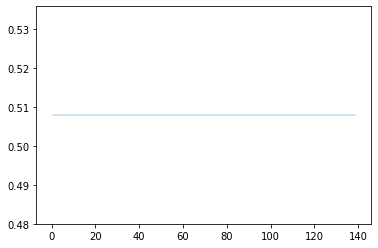

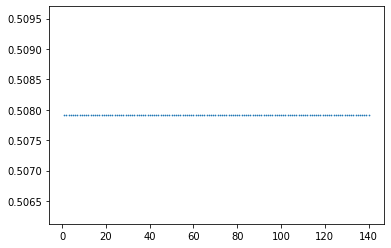

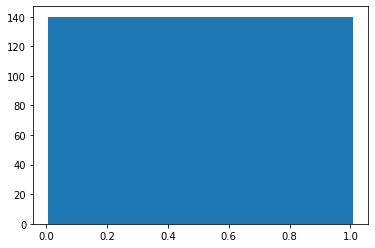

Average value is:  0.50791174
Total Predicted Positive:  140  out of  140
100.0 %
Epoch:  2
Train on 577 samples, validate on 140 samples
Epoch 1/1
577/577 [==============================] - 5s 9ms/step - loss: 0.6716 - acc: 1.0000 - val_loss: 0.6612 - val_acc: 1.0000
(140, 1)


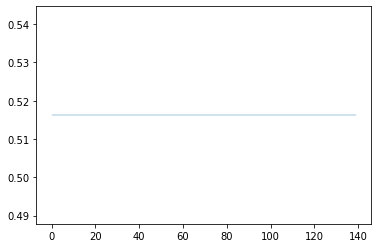

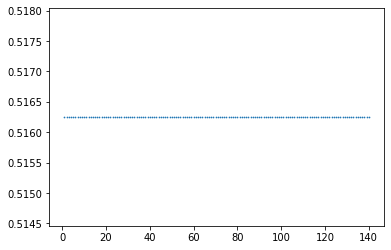

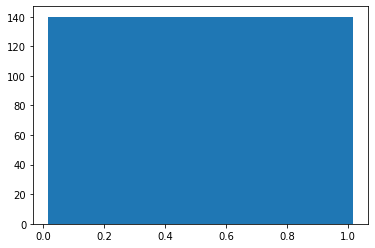

Average value is:  0.51624775
Total Predicted Positive:  140  out of  140
100.0 %
Epoch:  3
Train on 577 samples, validate on 140 samples
Epoch 1/1
577/577 [==============================] - 5s 9ms/step - loss: 0.6551 - acc: 1.0000 - val_loss: 0.6443 - val_acc: 1.0000
(140, 1)


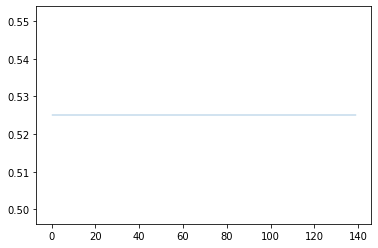

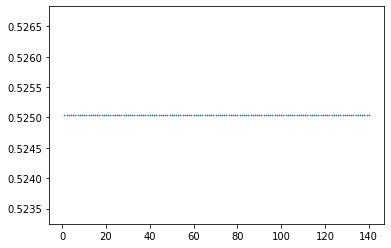

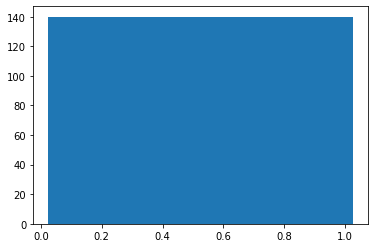

Average value is:  0.52503914
Total Predicted Positive:  140  out of  140
100.0 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## RNN Model 5
## create the model
modelRNNLSTM5 = 0
modelRNNLSTM5 = Sequential()
modelRNNLSTM5.add(cudnn_recurrent.CuDNNLSTM(units=2, input_shape=(flatten_value,3),return_sequences=True))
modelRNNLSTM5.add(cudnn_recurrent.CuDNNLSTM(units=2))
modelRNNLSTM5.add(Dense(1, activation='sigmoid'))
modelRNNLSTM5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelRNNLSTM5.build(flatten_shape) # `input_shape` is the shape of the input data

print(modelRNNLSTM5.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelRNNLSTM5.fit(X_train5_flatten, y_train5, epochs=1, batch_size=batch_size_user, validation_data = (X_val5_flatten, y_val5),verbose=1)

  # Test the model
  y_pred = modelRNNLSTM5.predict(X_val5_flatten)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_11 (CuDNNLSTM)    (None, 20000, 2)          56        
_________________________________________________________________
cu_dnnlstm_12 (CuDNNLSTM)    (None, 2)                 48        
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 3         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 707 samples, validate on 10 samples
Epoch 1/1
707/707 [==============================] - 8s 11ms/step - loss: 0.6858 - acc: 0.7878 - val_loss: 0.6734 - val_acc: 1.0000
(10, 1)


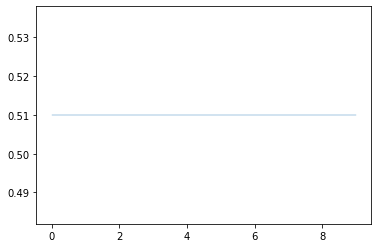

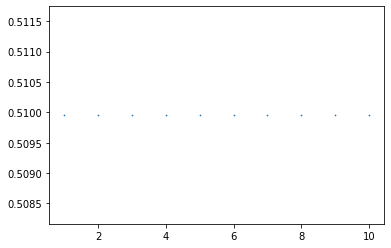

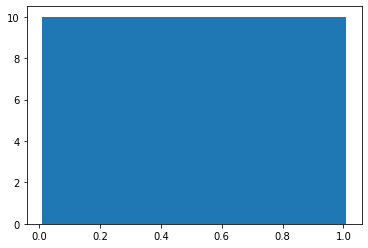

Average value is:  0.5099541
Total Predicted Positive:  10  out of  10
100.0 %
Epoch:  2
Train on 707 samples, validate on 10 samples
Epoch 1/1
707/707 [==============================] - 6s 9ms/step - loss: 0.6658 - acc: 1.0000 - val_loss: 0.6528 - val_acc: 1.0000
(10, 1)


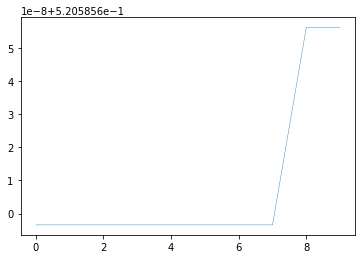

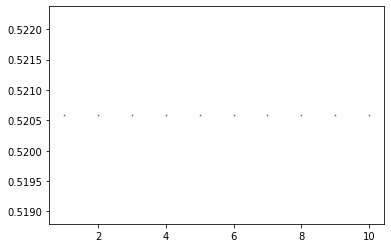

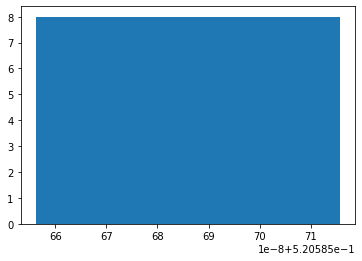

Average value is:  0.5205856
Total Predicted Positive:  10  out of  10
100.0 %
Epoch:  3
Train on 707 samples, validate on 10 samples
Epoch 1/1
707/707 [==============================] - 6s 9ms/step - loss: 0.6448 - acc: 1.0000 - val_loss: 0.6312 - val_acc: 1.0000
(10, 1)


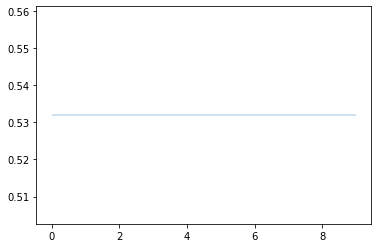

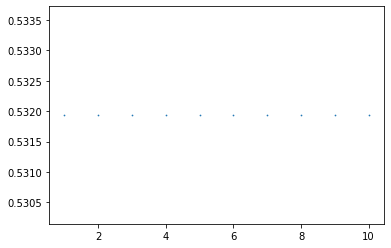

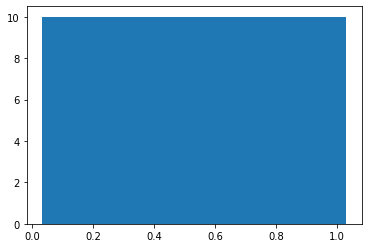

Average value is:  0.5319365
Total Predicted Positive:  0  out of  10
0.0 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## RNN Model 6
## create the model
modelRNNLSTM6 = 0
modelRNNLSTM6 = Sequential()
modelRNNLSTM6.add(cudnn_recurrent.CuDNNLSTM(units=2, input_shape=(flatten_value,3),return_sequences=True))
modelRNNLSTM6.add(cudnn_recurrent.CuDNNLSTM(units=2))
modelRNNLSTM6.add(Dense(1, activation='sigmoid'))
modelRNNLSTM6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelRNNLSTM6.build(flatten_shape) # `input_shape` is the shape of the input data

print(modelRNNLSTM6.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelRNNLSTM6.fit(X_train6_flatten, y_train6, epochs=1, batch_size=batch_size_user, validation_data = (X_val6_flatten, y_val6),verbose=1)

  # Test the model
  y_pred = modelRNNLSTM6.predict(X_val6_flatten)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_13 (CuDNNLSTM)    (None, 20000, 2)          56        
_________________________________________________________________
cu_dnnlstm_14 (CuDNNLSTM)    (None, 2)                 48        
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 3         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________
None
Epoch:  1
Train on 1 samples, validate on 715 samples
Epoch 1/1
1/1 [==============================] - 6s 6s/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6903 - val_acc: 1.0000
(715, 1)


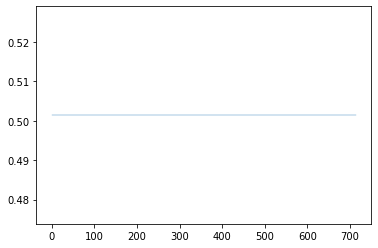

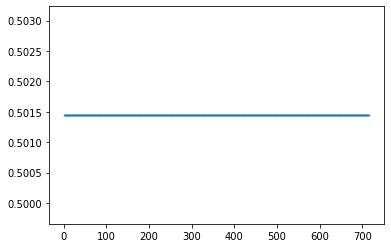

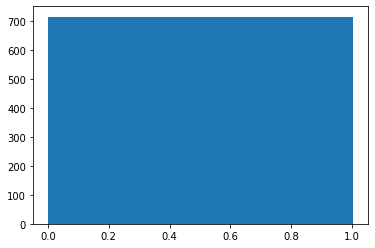

Average value is:  0.50144595
Total Predicted Positive:  715  out of  715
100.0 %
Epoch:  2
Train on 1 samples, validate on 715 samples
Epoch 1/1
1/1 [==============================] - 4s 4s/step - loss: 0.6903 - acc: 1.0000 - val_loss: 0.6869 - val_acc: 1.0000
(715, 1)


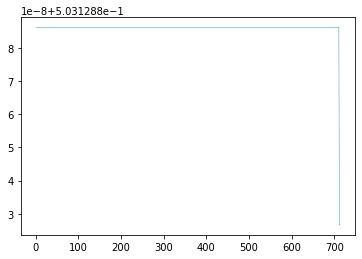

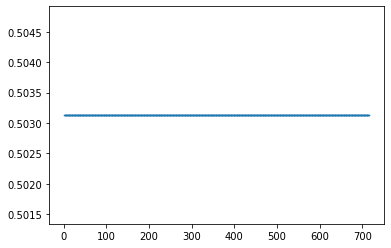

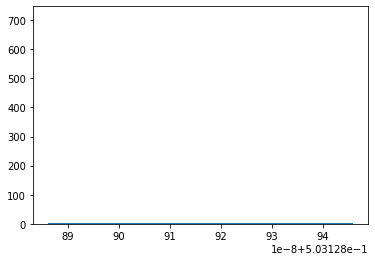

Average value is:  0.50312895
Total Predicted Positive:  0  out of  715
0.0 %
Epoch:  3
Train on 1 samples, validate on 715 samples
Epoch 1/1
1/1 [==============================] - 4s 4s/step - loss: 0.6869 - acc: 1.0000 - val_loss: 0.6833 - val_acc: 1.0000
(715, 1)


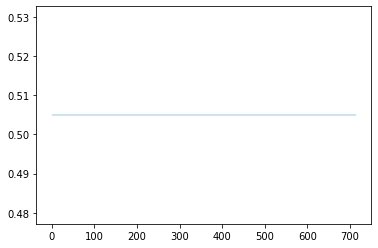

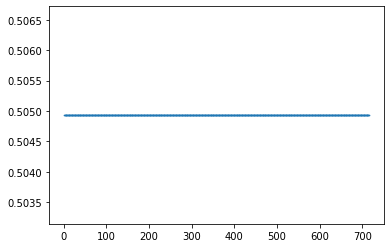

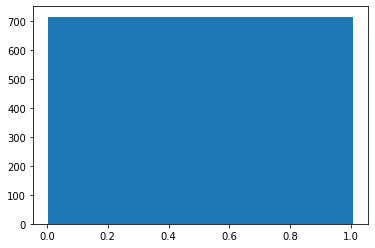

Average value is:  0.504932
Total Predicted Positive:  715  out of  715
100.0 %


In [0]:
# To ensure results can be repeated, the same seed value should be used for all testing
seed_value = 2020
seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value)

########################################################################################################################################################################
## RNN Model 7
## create the model
modelRNNLSTM7 = 0
modelRNNLSTM7 = Sequential()
modelRNNLSTM7.add(cudnn_recurrent.CuDNNLSTM(units=2, input_shape=(flatten_value,3),return_sequences=True))
modelRNNLSTM7.add(cudnn_recurrent.CuDNNLSTM(units=2))
modelRNNLSTM7.add(Dense(1, activation='sigmoid'))
modelRNNLSTM7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# build for different input shape
modelRNNLSTM7.build(flatten_shape) # `input_shape` is the shape of the input data

print(modelRNNLSTM7.summary())

epochCounter = 1
for counter in range(0,times_to_loop_model):
  print("Epoch: ", epochCounter)
  # Fit the model
  modelRNNLSTM7.fit(X_train7_flatten, y_train7, epochs=1, batch_size=batch_size_user, validation_data = (X_val7_flatten, y_val7),verbose=1)

  # Test the model
  y_pred = modelRNNLSTM7.predict(X_val7_flatten)

  # Print out the results
  print(y_pred.shape)

  plt.plot(y_pred, lw=0.4)
  plt.show()
  plt.scatter(range(1,len(y_pred)+1),y_pred[:,0],s=0.5)
  plt.show()
  plt.hist(y_pred,bins=len(np.unique(y_pred)))
  plt.show()

  avg = np.average(y_pred)
  print("Average value is: ", avg)

  y_pred_thres = y_pred

  y_pred_thres[y_pred_thres<avg] = 0
  y_pred_thres[y_pred_thres>=avg] = 1

  totalsum = 0
  for i in range(y_pred_thres.size):
    if(y_pred_thres[i] == 1):
      totalsum += 1

  print("Total Predicted Positive: ", totalsum, " out of ", len(y_pred_thres))
  print(totalsum / y_pred_thres.size * 100, "%")
  epochCounter += 1